# **Revised Project Statement:** 

For the Heart Disease Dataset, we want to classify the presence of heart disease using the best combinations of the dataset files (Cleveland, Hungarian, Switzerland, VA) based on the most relevant patient attributes.


**Well defined Question:**

How accurately can we predict the presence of heart disease using classification?


---
[Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease?spm=5176.100239.blogcont54260.8.TRNGoO)

**Data Set Information:**

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to
this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0).

The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

One file has been "processed", that one containing the Cleveland database. All four unprocessed files also exist in this directory.

To see Test Costs (donated by Peter Turney), please see the folder "Costs" 


---
**14 Attributes used:**

age, sex, cp, trestbps,chol, fbs, restecg,thalach, exang, oldpeak, slope, ca, thal,num

**Description of 13 Input variables**

**Age:** age of the patient

**Sex:**

0: Female

1: Male

**Chest Pain Type (cp):**

0: Typical Angina

1: Atypical Angina

2: Non-Anginal Pain

3: Asymptomatic

**Resting Blood Pressure:** Person's resting blood pressure(trestbps).

**Cholesterol (chol):** Serum Cholesterol in mg/dl

**Fasting Blood Sugar (fbs):**

0:Less Than 120mg/ml

1: Greater Than 120mg/ml

**Resting Electrocardiographic Measurement(restecg):**

0: Normal

1: ST-T Wave Abnormality

2: Left Ventricular Hypertrophy

**Max Heart Rate Achieved (thalch):** Maximum Heart Rate Achieved 

**Exercise Induced Angina (exang):**

1: Yes

0: No

**ST Depression (oldpeak):** ST depression induced by exercise relative to rest.
**Slope:** Slope of the peak exercise ST segment (slope):

0: Upsloping

1: Flat

2: Downsloping

**Thalassemia (thal):** A blood disorder called 'Thalassemia' :

0: Normal

1: Fixed Defect

2: Reversible Defect

**Number of Major Vessels (ca):** Number of major vessels colored by fluoroscopy.

** 1 Output variables:** 
**num:** diagnosis of heart disease (angiographic disease status): 
    
 0-  < 50% diameter narrowing 
 
 1- > 50% diameter narrowing

---


##**Library Import**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# compare knn imputation strategies for the horse colic dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

##**Loading all the dataset**

**Upload the Cleveland Data**

In [ ]:
#upload the file in the lab
from google.colab import files
uploaded = files.upload()
#read the datafile using pandas read_csv


Saving processed.cleveland.data to processed.cleveland (1).data


In [ ]:
import io
cleveland_df= pd.read_csv(io.BytesIO(uploaded['processed.cleveland.data']), header=None)
cleveland_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
cleveland_df

age  sex   cp  trestbps   chol  fbs  ...  exang  oldpeak  slope   ca  thal num
0    63.0  1.0  1.0     145.0  233.0  1.0  ...    0.0      2.3    3.0  0.0   6.0   0
1    67.0  1.0  4.0     160.0  286.0  0.0  ...    1.0      1.5    2.0  3.0   3.0   2
2    67.0  1.0  4.0     120.0  229.0  0.0  ...    1.0      2.6    2.0  2.0   7.0   1
3    37.0  1.0  3.0     130.0  250.0  0.0  ...    0.0      3.5    3.0  0.0   3.0   0
4    41.0  0.0  2.0     130.0  204.0  0.0  ...    0.0      1.4    1.0  0.0   3.0   0
..    ...  ...  ...       ...    ...  ...  ...    ...      ...    ...  ...   ...  ..
298  45.0  1.0  1.0     110.0  264.0  0.0  ...    0.0      1.2    2.0  0.0   7.0   1
299  68.0  1.0  4.0     144.0  193.0  1.0  ...    0.0      3.4    2.0  2.0   7.0   2
300  57.0  1.0  4.0     130.0  131.0  0.0  ...    1.0      1.2    2.0  1.0   7.0   3
301  57.0  0.0  2.0     130.0  236.0  0.0  ...    0.0      0.0    2.0  1.0   3.0   1
302  38.0  1.0  3.0     138.0  175.0  0.0  ...    0.0      0.0    1.0    ?   3.0   0

[303 rows x 14 columns]

**Upload Switzerland data**

In [ ]:
#upload the file in the lab
from google.colab import files
uploaded = files.upload()
#read the datafile using pandas read_csv
import io
switzerland_df= pd.read_csv(io.BytesIO(uploaded['processed.switzerland_chol_missing.txt']), header=None)
switzerland_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
switzerland_df 


Saving processed.switzerland_chol_missing.txt to processed.switzerland_chol_missing (1).txt


age  sex  cp trestbps chol fbs  ... exang oldpeak slope ca thal num
0     32    1   1       95    ?   ?  ...     0      .7     1  ?    ?   1
1     34    1   4      115    ?   ?  ...     0      .2     1  ?    ?   1
2     35    1   4        ?    ?   ?  ...     1       ?     ?  ?    7   3
3     36    1   4      110    ?   ?  ...     1       1     2  ?    6   1
4     38    0   4      105    ?   ?  ...     0     2.8     1  ?    ?   2
..   ...  ...  ..      ...  ...  ..  ...   ...     ...   ... ..  ...  ..
118   70    1   4      115    ?   0  ...     1       0     2  ?    7   1
119   70    1   4      140    ?   1  ...     1       2     2  ?    7   3
120   72    1   3      160    ?   ?  ...     0     1.6     2  2    ?   0
121   73    0   3      160    ?   0  ...     0       0     1  ?    3   1
122   74    1   2      145    ?   ?  ...     0     1.3     1  ?    ?   1

[123 rows x 14 columns]

**Upload the Hungarian dataset**

In [ ]:
#upload the file in the lab
from google.colab import files
uploaded = files.upload()
#read the datafile using pandas read_csv
import io
hungarian_df= pd.read_csv(io.BytesIO(uploaded['processed.hungarian.data']), header=None)
hungarian_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
hungarian_df 

Saving processed.hungarian.data to processed.hungarian.data


age  sex  cp trestbps chol fbs  ... exang oldpeak slope  ca thal num
0     28    1   2      130  132   0  ...     0     0.0     ?   ?    ?   0
1     29    1   2      120  243   0  ...     0     0.0     ?   ?    ?   0
2     29    1   2      140    ?   0  ...     0     0.0     ?   ?    ?   0
3     30    0   1      170  237   0  ...     0     0.0     ?   ?    6   0
4     31    0   2      100  219   0  ...     0     0.0     ?   ?    ?   0
..   ...  ...  ..      ...  ...  ..  ...   ...     ...   ...  ..  ...  ..
289   52    1   4      160  331   0  ...     1     2.5     ?   ?    ?   1
290   54    0   3      130  294   0  ...     1     0.0     2   ?    ?   1
291   56    1   4      155  342   1  ...     1     3.0     2   ?    ?   1
292   58    0   2      180  393   0  ...     1     1.0     2   ?    7   1
293   65    1   4      130  275   0  ...     1     1.0     2   ?    ?   1

[294 rows x 14 columns]

**Upload the VA dataset**

In [ ]:
#upload the file in the lab
from google.colab import files
uploaded = files.upload()
#read the datafile using pandas read_csv
import io
va_df= pd.read_csv(io.BytesIO(uploaded['processed.va.data']), header=None)
va_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
va_df 


Saving processed.va.data to processed.va.data


age  sex  cp trestbps chol fbs  ...  exang oldpeak slope ca thal num
0     63    1   4      140  260   0  ...      1       3     2  ?    ?   2
1     44    1   4      130  209   0  ...      0       0     ?  ?    ?   0
2     60    1   4      132  218   0  ...      1     1.5     3  ?    ?   2
3     55    1   4      142  228   0  ...      1     2.5     1  ?    ?   1
4     66    1   3      110  213   1  ...      1     1.3     2  ?    ?   0
..   ...  ...  ..      ...  ...  ..  ...    ...     ...   ... ..  ...  ..
195   54    0   4      127  333   1  ...      0       0     ?  ?    ?   1
196   62    1   1        ?  139   0  ...      ?       ?     ?  ?    ?   0
197   55    1   4      122  223   1  ...      0       0     ?  ?    6   2
198   58    1   4        ?  385   1  ...      ?       ?     ?  ?    ?   0
199   62    1   2      120  254   0  ...      1       0     ?  ?    ?   1

[200 rows x 14 columns]

**Shape of the datasets**

In [ ]:
print(" Cleveland dataset: ( rows, columns) = ",cleveland_df.shape)
print(" Switzerland dataset: ( rows, columns) = ",switzerland_df.shape)
print(" Hungarian dataset: ( rows, columns) = ",hungarian_df.shape)
print(" VA dataset: ( rows, columns) = ",va_df.shape)


 Cleveland dataset: ( rows, columns) =  (303, 14)
 Switzerland dataset: ( rows, columns) =  (123, 14)
 Hungarian dataset: ( rows, columns) =  (294, 14)
 VA dataset: ( rows, columns) =  (200, 14)


**Check the missing values in each columns**

In [ ]:
# Missing data in Cleveland dataset marking as Nan and finding its frequency in each column
cleveland_df = cleveland_df.replace('?', np.nan)
cleveland_nan = pd.DataFrame(cleveland_df.isnull().sum())
cleveland_nan

0
age       0
sex       0
cp        0
trestbps  0
chol      0
fbs       0
restecg   0
thalach   0
exang     0
oldpeak   0
slope     0
ca        4
thal      2
num       0

In [ ]:
# Missing data in Switzerland dataset marking as Nan and finding its frequency in each column
switzerland_df = switzerland_df.replace('?', np.nan)
switzerland_nan = pd.DataFrame(switzerland_df.isnull().sum())
switzerland_nan

0
age         0
sex         0
cp          0
trestbps    2
chol      123
fbs        75
restecg     1
thalach     1
exang       1
oldpeak     6
slope      17
ca        118
thal       52
num         0

In [ ]:
# Missing data in Hungarian dataset marking as Nan and finding its frequency in each column
hungarian_df = hungarian_df.replace('?', np.nan)
hungarian_nan = pd.DataFrame(hungarian_df.isnull().sum())
hungarian_nan

0
age         0
sex         0
cp          0
trestbps    1
chol       23
fbs         8
restecg     1
thalach     1
exang       1
oldpeak     0
slope     190
ca        291
thal      266
num         0

In [ ]:
# Missing data in VA dataset marking as Nan and finding its frequency in each column
va_df = va_df.replace('?', np.nan)
va_nan = pd.DataFrame(va_df.isnull().sum())
va_nan

0
age         0
sex         0
cp          0
trestbps   56
chol        7
fbs         7
restecg     0
thalach    53
exang      53
oldpeak    56
slope     102
ca        198
thal      166
num         0

**Descriptive statistics of the each features( this will help use to identify some type errors or sometimes zero rows**

In [ ]:
cleveland_df.describe(include='all')


age         sex          cp  ...   ca  thal         num
count   303.000000  303.000000  303.000000  ...  299   301  303.000000
unique         NaN         NaN         NaN  ...    4     3         NaN
top            NaN         NaN         NaN  ...  0.0   3.0         NaN
freq           NaN         NaN         NaN  ...  176   166         NaN
mean     54.438944    0.679868    3.158416  ...  NaN   NaN    0.937294
std       9.038662    0.467299    0.960126  ...  NaN   NaN    1.228536
min      29.000000    0.000000    1.000000  ...  NaN   NaN    0.000000
25%      48.000000    0.000000    3.000000  ...  NaN   NaN    0.000000
50%      56.000000    1.000000    3.000000  ...  NaN   NaN    0.000000
75%      61.000000    1.000000    4.000000  ...  NaN   NaN    2.000000
max      77.000000    1.000000    4.000000  ...  NaN   NaN    4.000000

[11 rows x 14 columns]

In [ ]:
switzerland_df.describe(include='all')


age         sex          cp trestbps  ...  slope   ca thal         num
count   123.000000  123.000000  123.000000      121  ...    106    5   71  123.000000
unique         NaN         NaN         NaN       20  ...      3    2    3         NaN
top            NaN         NaN         NaN      115  ...      2    2    7         NaN
freq           NaN         NaN         NaN       14  ...     61    3   42         NaN
mean     55.317073    0.918699    3.699187      NaN  ...    NaN  NaN  NaN    1.804878
std       9.032108    0.274414    0.688726      NaN  ...    NaN  NaN  NaN    1.013503
min      32.000000    0.000000    1.000000      NaN  ...    NaN  NaN  NaN    0.000000
25%      51.000000    1.000000    4.000000      NaN  ...    NaN  NaN  NaN    1.000000
50%      56.000000    1.000000    4.000000      NaN  ...    NaN  NaN  NaN    2.000000
75%      61.500000    1.000000    4.000000      NaN  ...    NaN  NaN  NaN    3.000000
max      74.000000    1.000000    4.000000      NaN  ...    NaN  NaN  NaN    4.000000

[11 rows x 14 columns]

In [ ]:
hungarian_df.describe(include="all")


age         sex          cp trestbps  ... slope   ca thal         num
count   294.000000  294.000000  294.000000      293  ...   104    3   28  294.000000
unique         NaN         NaN         NaN       31  ...     3    1    3         NaN
top            NaN         NaN         NaN      120  ...     2    0    7         NaN
freq           NaN         NaN         NaN       65  ...    91    3   11         NaN
mean     47.826531    0.724490    2.982993      NaN  ...   NaN  NaN  NaN    0.360544
std       7.811812    0.447533    0.965117      NaN  ...   NaN  NaN  NaN    0.480977
min      28.000000    0.000000    1.000000      NaN  ...   NaN  NaN  NaN    0.000000
25%      42.000000    0.000000    2.000000      NaN  ...   NaN  NaN  NaN    0.000000
50%      49.000000    1.000000    3.000000      NaN  ...   NaN  NaN  NaN    0.000000
75%      54.000000    1.000000    4.000000      NaN  ...   NaN  NaN  NaN    1.000000
max      66.000000    1.000000    4.000000      NaN  ...   NaN  NaN  NaN    1.000000

[11 rows x 14 columns]

In [ ]:
va_df.describe(include='all')

age         sex          cp trestbps  ... slope   ca  thal         num
count   200.000000  200.000000  200.000000      144  ...    98    2    34  200.000000
unique         NaN         NaN         NaN       40  ...     3    1     3         NaN
top            NaN         NaN         NaN      120  ...     2    0     7         NaN
freq           NaN         NaN         NaN       16  ...    53    2    22         NaN
mean     59.350000    0.970000    3.505000      NaN  ...   NaN  NaN   NaN    1.520000
std       7.811697    0.171015    0.795701      NaN  ...   NaN  NaN   NaN    1.219441
min      35.000000    0.000000    1.000000      NaN  ...   NaN  NaN   NaN    0.000000
25%      55.000000    1.000000    3.000000      NaN  ...   NaN  NaN   NaN    0.000000
50%      60.000000    1.000000    4.000000      NaN  ...   NaN  NaN   NaN    1.000000
75%      64.000000    1.000000    4.000000      NaN  ...   NaN  NaN   NaN    3.000000
max      77.000000    1.000000    4.000000      NaN  ...   NaN  NaN   NaN    4.000000

[11 rows x 14 columns]

#**Data Cleaning**

 ## Basic Data cleaning


Redantant columns : 

**Identifying the columns with single values:**  Delete them

**Identifying  the columns with very few values but more than one:**

Be careful before deleting as it might be representing the categorical dataset. 



  

In [ ]:
# Checking for Redundant columns

print("\n\nUnique column values in Cleveland dataset\n", cleveland_df.nunique())




Unique column values in Cleveland dataset
 age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
num           5
dtype: int64


In [ ]:
# Checking for Redundant columns
print("\n\nUnique column values in Switzerland dataset\n", switzerland_df.nunique())



Unique column values in Switzerland dataset
 age         37
sex          2
cp           4
trestbps    20
chol         0
fbs          2
restecg      3
thalach     67
exang        2
oldpeak     35
slope        3
ca           2
thal         3
num          5
dtype: int64


In [ ]:
# Checking for Redundant columns
print("\n\nUnique column values in Hungarian dataset\n", hungarian_df.nunique())




Unique column values in Hungarian dataset
 age          38
sex           2
cp            4
trestbps     31
chol        153
fbs           2
restecg       3
thalach      71
exang         2
oldpeak      10
slope         3
ca            1
thal          3
num           2
dtype: int64


In [ ]:
# Checking for Redundant columns
print("\n\nUnique column values in VA dataset\n", va_df.nunique())



Unique column values in VA dataset
 age         39
sex          2
cp           4
trestbps    40
chol        99
fbs          2
restecg      3
thalach     59
exang        2
oldpeak     14
slope        3
ca           1
thal         3
num          5
dtype: int64


**Decision:** No column has only one value and the columns with very few values(more than one) are categorical columns.. not deleting any  

*Basic data cleaning*

Duplicate Rows

In [ ]:
dups_cleveland=cleveland_df.duplicated()
print(dups_cleveland.any())
print(cleveland_df[dups_cleveland])

False
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num]
Index: []


In [ ]:
dups_switzerland=switzerland_df.duplicated()
print(dups_switzerland.any())
print(switzerland_df[dups_switzerland])

False
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, num]
Index: []


In [ ]:
dups_hungarian= hungarian_df.duplicated()
print(dups_hungarian.any())
print(hungarian_df[dups_hungarian])

True
     age  sex  cp trestbps chol fbs  ... exang oldpeak slope   ca thal num
102   49    0   2      110  NaN   0  ...     0     0.0   NaN  NaN  NaN   0

[1 rows x 14 columns]


In [ ]:
dups_va= va_df.duplicated()
print(dups_va.any())
print(va_df[dups_va])

True
     age  sex  cp trestbps chol fbs  ...  exang oldpeak slope   ca thal num
187   58    1   3      150  219   0  ...      1       0   NaN  NaN  NaN   2

[1 rows x 14 columns]


#**Imuputation**
We will run *KNN imputer* and *Iterative imputer* on 5 different combination of dataframes as follows:


In [ ]:

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


import os
import warnings

warnings.filterwarnings('ignore')

##**Creating different Dataframes**

Below are the combination of different dataset 
1. Cleveland , hungarian , switzerland , Va
2. Cleveland , hungarian  
3. Cleveland , switzerland
4. Cleveland , hungarian , switzerland
5. Cleveland


We are trying to find best K value for KNN_Imputer by applying RandomforestClassifier to find bext accuracy

###**1. Cleveland + hungarian + switzerland + Va**

In [ ]:
#Complete dataset
Heart_Disease_DF = pd.concat([cleveland_df,hungarian_df,switzerland_df,va_df])
Heart_Disease_DF.shape

(920, 14)

###**2. Cleveland + hungarian**

In [ ]:
Clev_hung_df = pd.concat([cleveland_df,hungarian_df])

###**3. Cleveland + switzerland**

In [ ]:
Clev_switz_df = pd.concat([cleveland_df,switzerland_df])

###**4. Cleveland + switzerland + hungarian**

In [ ]:
Clev_hung_switz_df = pd.concat([cleveland_df,hungarian_df,switzerland_df])

###**--------------------KNN imputation-------------------------**


###**KNN Imputer** 

* Use MinMaxScaler to scale X
* Converting target variables to binary


In [ ]:
#function to optimize the knn imputer
def optimize_knn_imputer(data, target,name):
    results = list()
    dict = {'Name':[],
        'K':[],
        'MeanAccuracy':[],
        'stdAccuracy':[]
       }
    df = pd.DataFrame(dict)
    for s in range(1, 50, 2):
        imputer = KNNImputer(n_neighbors=s, weights='distance', metric='nan_euclidean')
        array = data.values
        X = array [:,:-1]
        Y = data[target]
        
        #converting target variables to binary
        data['num'][data.num >0] = 1
        Y_temp = data['num']

    
        trans = MinMaxScaler()
        trans_X = trans.fit_transform(X)
        
        X_imputed = imputer.fit_transform(trans_X)
        X_imputed_df = pd.DataFrame(X_imputed, columns=data.drop(target, axis=1).columns)
        
        model = RandomForestClassifier()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(model, X_imputed, Y_temp, scoring='accuracy', cv=cv, n_jobs=-1)       
        results.append(scores)
        df.loc[len(df.index)] = [name, s, mean(scores), std(scores)] 
        #print('>K : %s --> Mean : %.3f --> Std : (%.3f)' % (s, mean(scores), std(scores)))   
    #max(results)
    display(df)
    pyplot.boxplot(results, labels=range(1, 50, 2), showmeans=True)
    pyplot.show()
    return df
    #df.loc[df['MeanAccuracy'] == df['MeanAccuracy'].max()] 

###**1. KNN imputation on Cleveland + hungarian + switzerland + Va**

Name     K  MeanAccuracy  stdAccuracy
0   cleveland+hungarian+switzerland+va   1.0      0.805435     0.032530
1   cleveland+hungarian+switzerland+va   3.0      0.819565     0.032318
2   cleveland+hungarian+switzerland+va   5.0      0.816667     0.036564
3   cleveland+hungarian+switzerland+va   7.0      0.810145     0.030838
4   cleveland+hungarian+switzerland+va   9.0      0.811594     0.034411
5   cleveland+hungarian+switzerland+va  11.0      0.810870     0.029381
6   cleveland+hungarian+switzerland+va  13.0      0.822101     0.027851
7   cleveland+hungarian+switzerland+va  15.0      0.819928     0.031713
8   cleveland+hungarian+switzerland+va  17.0      0.821377     0.029258
9   cleveland+hungarian+switzerland+va  19.0      0.822101     0.026400
10  cleveland+hungarian+switzerland+va  21.0      0.819565     0.025814
11  cleveland+hungarian+switzerland+va  23.0      0.825362     0.029825
12  cleveland+hungarian+switzerland+va  25.0      0.824275     0.032132
13  cleveland+hungarian+switzerland+va  27.0      0.827536     0.033996
14  cleveland+hungarian+switzerland+va  29.0      0.821377     0.029659
15  cleveland+hungarian+switzerland+va  31.0      0.822101     0.033027
16  cleveland+hungarian+switzerland+va  33.0      0.828623     0.025365
17  cleveland+hungarian+switzerland+va  35.0      0.826449     0.030029
18  cleveland+hungarian+switzerland+va  37.0      0.823551     0.030575
19  cleveland+hungarian+switzerland+va  39.0      0.827174     0.031170
20  cleveland+hungarian+switzerland+va  41.0      0.828623     0.030703
21  cleveland+hungarian+switzerland+va  43.0      0.830072     0.032303
22  cleveland+hungarian+switzerland+va  45.0      0.828623     0.028300
23  cleveland+hungarian+switzerland+va  47.0      0.829710     0.028112
24  cleveland+hungarian+switzerland+va  49.0      0.826087     0.029701

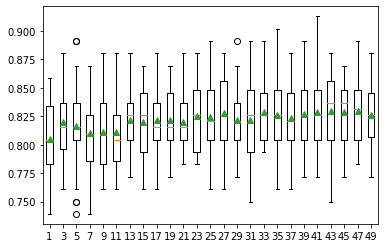

In [ ]:
df1 = optimize_knn_imputer(Heart_Disease_DF,'num','cleveland+hungarian+switzerland+va')

In [ ]:
df1.loc[df1['MeanAccuracy'] == df1['MeanAccuracy'].max()] 
# getting slightly different result than anwesh

Name     K  MeanAccuracy  stdAccuracy
21  cleveland+hungarian+switzerland+va  43.0      0.830072     0.032303

###**2. KNN imputation on Cleveland + hungarian**

Name     K  MeanAccuracy  stdAccuracy
0   cleveland+hungarian   1.0      0.829680     0.047366
1   cleveland+hungarian   3.0      0.845923     0.038397
2   cleveland+hungarian   5.0      0.832533     0.044030
3   cleveland+hungarian   7.0      0.843145     0.040971
4   cleveland+hungarian   9.0      0.834209     0.040264
5   cleveland+hungarian  11.0      0.833126     0.039185
6   cleveland+hungarian  13.0      0.835348     0.037653
7   cleveland+hungarian  15.0      0.838682     0.043106
8   cleveland+hungarian  17.0      0.830838     0.042521
9   cleveland+hungarian  19.0      0.830273     0.036754
10  cleveland+hungarian  21.0      0.838117     0.038712
11  cleveland+hungarian  23.0      0.833691     0.044959
12  cleveland+hungarian  25.0      0.833635     0.044149
13  cleveland+hungarian  27.0      0.840339     0.044912
14  cleveland+hungarian  29.0      0.835866     0.039988
15  cleveland+hungarian  31.0      0.832495     0.042012
16  cleveland+hungarian  33.0      0.841450     0.046205
17  cleveland+hungarian  35.0      0.833635     0.040898
18  cleveland+hungarian  37.0      0.836959     0.034755
19  cleveland+hungarian  39.0      0.832486     0.042107
20  cleveland+hungarian  41.0      0.833625     0.039659
21  cleveland+hungarian  43.0      0.838126     0.043696
22  cleveland+hungarian  45.0      0.831337     0.047627
23  cleveland+hungarian  47.0      0.835292     0.044583
24  cleveland+hungarian  49.0      0.834190     0.042012

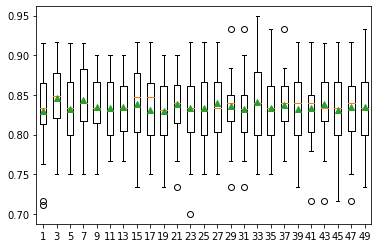

In [ ]:
df2 = optimize_knn_imputer(Clev_hung_df,'num','cleveland+hungarian')

In [ ]:
df2.loc[df2['MeanAccuracy'] == df2['MeanAccuracy'].max()] 

Name    K  MeanAccuracy  stdAccuracy
1  cleveland+hungarian  3.0      0.845923     0.038397

###**3. KNN imputation on Cleveland + Switzerland**

Name     K  MeanAccuracy  stdAccuracy
0   cleveland+switzerland   1.0      0.816168     0.057148
1   cleveland+switzerland   3.0      0.842709     0.056854
2   cleveland+switzerland   5.0      0.835751     0.053808
3   cleveland+switzerland   7.0      0.848985     0.054957
4   cleveland+switzerland   9.0      0.837265     0.058919
5   cleveland+switzerland  11.0      0.843429     0.050089
6   cleveland+switzerland  13.0      0.842691     0.057920
7   cleveland+switzerland  15.0      0.851292     0.055282
8   cleveland+switzerland  17.0      0.844241     0.053378
9   cleveland+switzerland  19.0      0.846622     0.055001
10  cleveland+switzerland  21.0      0.851310     0.056689
11  cleveland+switzerland  23.0      0.856848     0.053865
12  cleveland+switzerland  25.0      0.845829     0.056419
13  cleveland+switzerland  27.0      0.842783     0.051013
14  cleveland+switzerland  29.0      0.856774     0.057115
15  cleveland+switzerland  31.0      0.850498     0.056485
16  cleveland+switzerland  33.0      0.849815     0.055231
17  cleveland+switzerland  35.0      0.852141     0.055467
18  cleveland+switzerland  37.0      0.849003     0.059471
19  cleveland+switzerland  39.0      0.851366     0.057378
20  cleveland+switzerland  41.0      0.841178     0.056710
21  cleveland+switzerland  43.0      0.852805     0.060730
22  cleveland+switzerland  45.0      0.859930     0.057966
23  cleveland+switzerland  47.0      0.848302     0.053278
24  cleveland+switzerland  49.0      0.854485     0.055703

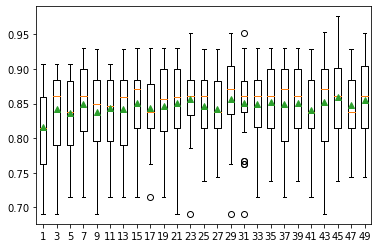

In [ ]:
df3 = optimize_knn_imputer(Clev_switz_df,'num','cleveland+switzerland')

In [ ]:
df3.loc[df3['MeanAccuracy'] == df3['MeanAccuracy'].max()] 

Name     K  MeanAccuracy  stdAccuracy
22  cleveland+switzerland  45.0       0.85993     0.057966

###**4. KNN imputation on Cleveland + hungarian + switzerland**

Name     K  MeanAccuracy  stdAccuracy
0   cleveland+hungarian+switzerland   1.0      0.826852     0.041159
1   cleveland+hungarian+switzerland   3.0      0.831944     0.034648
2   cleveland+hungarian+switzerland   5.0      0.837500     0.030461
3   cleveland+hungarian+switzerland   7.0      0.828704     0.029860
4   cleveland+hungarian+switzerland   9.0      0.826389     0.037569
5   cleveland+hungarian+switzerland  11.0      0.824537     0.037351
6   cleveland+hungarian+switzerland  13.0      0.839352     0.035443
7   cleveland+hungarian+switzerland  15.0      0.837037     0.041810
8   cleveland+hungarian+switzerland  17.0      0.838426     0.035042
9   cleveland+hungarian+switzerland  19.0      0.838426     0.040171
10  cleveland+hungarian+switzerland  21.0      0.844444     0.037850
11  cleveland+hungarian+switzerland  23.0      0.837963     0.038512
12  cleveland+hungarian+switzerland  25.0      0.845833     0.034275
13  cleveland+hungarian+switzerland  27.0      0.846759     0.030107
14  cleveland+hungarian+switzerland  29.0      0.843981     0.032411
15  cleveland+hungarian+switzerland  31.0      0.846759     0.032172
16  cleveland+hungarian+switzerland  33.0      0.839352     0.035804
17  cleveland+hungarian+switzerland  35.0      0.842593     0.031739
18  cleveland+hungarian+switzerland  37.0      0.843981     0.032805
19  cleveland+hungarian+switzerland  39.0      0.840741     0.035452
20  cleveland+hungarian+switzerland  41.0      0.840278     0.034722
21  cleveland+hungarian+switzerland  43.0      0.847222     0.031056
22  cleveland+hungarian+switzerland  45.0      0.843981     0.034710
23  cleveland+hungarian+switzerland  47.0      0.848611     0.030503
24  cleveland+hungarian+switzerland  49.0      0.846759     0.034300

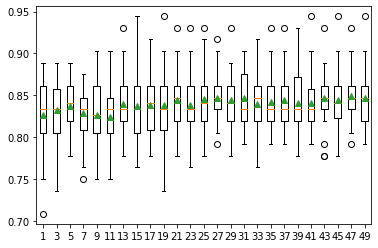

In [ ]:
df4 = optimize_knn_imputer(Clev_hung_switz_df,'num','cleveland+hungarian+switzerland')

In [ ]:
df4.loc[df4['MeanAccuracy'] == df4['MeanAccuracy'].max()] 

Name     K  MeanAccuracy  stdAccuracy
23  cleveland+hungarian+switzerland  47.0      0.848611     0.030503

###**5. KNN imputation on Cleveland**

Name     K  MeanAccuracy  stdAccuracy
0   cleveland   1.0      0.815197     0.054754
1   cleveland   3.0      0.820538     0.056571
2   cleveland   5.0      0.826237     0.055771
3   cleveland   7.0      0.821756     0.056219
4   cleveland   9.0      0.812796     0.055386
5   cleveland  11.0      0.827204     0.046728
6   cleveland  13.0      0.822832     0.054934
7   cleveland  15.0      0.816308     0.045394
8   cleveland  17.0      0.827168     0.056620
9   cleveland  19.0      0.826165     0.050444
10  cleveland  21.0      0.825090     0.050961
11  cleveland  23.0      0.825125     0.050096
12  cleveland  25.0      0.825090     0.051191
13  cleveland  27.0      0.818530     0.058026
14  cleveland  29.0      0.826165     0.055969
15  cleveland  31.0      0.825054     0.056884
16  cleveland  33.0      0.830609     0.051953
17  cleveland  35.0      0.825054     0.056843
18  cleveland  37.0      0.819570     0.050128
19  cleveland  39.0      0.826237     0.056139
20  cleveland  41.0      0.827276     0.057400
21  cleveland  43.0      0.822975     0.048949
22  cleveland  45.0      0.821828     0.057252
23  cleveland  47.0      0.820645     0.051727
24  cleveland  49.0      0.829462     0.054708

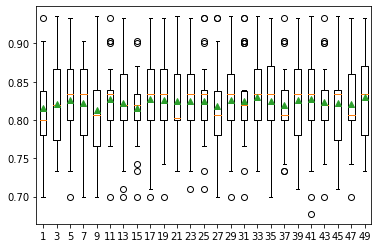

In [ ]:
df5 = optimize_knn_imputer(cleveland_df,'num','cleveland')

In [ ]:
df5.loc[df5['MeanAccuracy'] == df5['MeanAccuracy'].max()] 

Name     K  MeanAccuracy  stdAccuracy
16  cleveland  33.0      0.830609     0.051953

#**Iterative Imputation-**

---



##**Iterative Imputer**

In [ ]:
def optimize_IterativeImputer_imputer(data, target,name):

    results = list()
    dict={'Name': [],
          'ImputationOrder' : [],
          'Mean_Accuracy':[],
          'std_Dev':[]
    }
    df=pd.DataFrame(dict)
    for s in ['ascending', 'descending', 'roman', 'arabic', 'random']:
        #imputer = KNNImputer(n_neighbors=s, weights='distance', metric='nan_euclidean')
        imputer = IterativeImputer(imputation_order=s)
        array = data.values
        X = array [:,:-1]
        Y = data[target]
        
        #Converting Target Variables to Binary
        data['num'][data.num >0] = 1
        Y_temp = data['num']

        trans = MinMaxScaler()
        trans_X = trans.fit_transform(X)
        
        X_imputed = imputer.fit_transform(trans_X)
        X_imputed_df = pd.DataFrame(X_imputed, columns=data.drop(target, axis=1).columns)
        
        model = RandomForestClassifier()
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        scores = cross_val_score(model, X_imputed, Y_temp, scoring='accuracy', cv=cv, n_jobs=-1)       
        results.append(scores)
        #print(' %s --> Mean : %.3f --> Std : (%.3f)' % (s, mean(scores), std(scores)))  
        df.loc[len(df.index)] = [name, s, mean(scores), std(scores)] 
    display(df)
    plt.boxplot(results, labels=['ascending', 'descending', 'roman', 'arabic', 'random'], showmeans=True)
    plt.show()
    return df

###**1. Iterative imputation on Cleveland + Hungarian + Switzerland + VA**

Name ImputationOrder  Mean_Accuracy   std_Dev
0  Clevel + Hung + Switz + VA       ascending       0.817029  0.031009
1  Clevel + Hung + Switz + VA      descending       0.817029  0.030754
2  Clevel + Hung + Switz + VA           roman       0.818478  0.035405
3  Clevel + Hung + Switz + VA          arabic       0.817391  0.031925
4  Clevel + Hung + Switz + VA          random       0.821014  0.030192

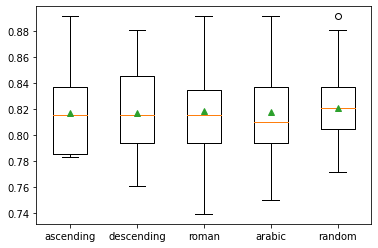

In [ ]:
df1_imput=optimize_IterativeImputer_imputer(Heart_Disease_DF,'num','Clevel + Hung + Switz + VA')

In [ ]:
# Trying to print the max.. but getting an error.. if you can please feel free to solve it.. aim is to print the best score
df1_imput.loc[df1_imput['Mean_Accuracy'] == df1_imput['Mean_Accuracy'].max()] 

Name ImputationOrder  Mean_Accuracy   std_Dev
4  Clevel + Hung + Switz + VA          random       0.821014  0.030192

###**2. Iterative imputation on Cleveland + Hungarian**

Name ImputationOrder  Mean_Accuracy   std_Dev
0  clev+hung       ascending       0.834200  0.041356
1  clev+hung      descending       0.829746  0.044160
2  clev+hung           roman       0.834228  0.037421
3  clev+hung          arabic       0.832552  0.045071
4  clev+hung          random       0.829209  0.041237

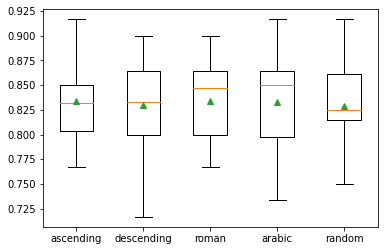

In [ ]:
df2_imput=optimize_IterativeImputer_imputer(Clev_hung_df,'num','clev+hung')

In [ ]:
df2_imput.loc[df2_imput['Mean_Accuracy'] == df2_imput['Mean_Accuracy'].max()] 

Name ImputationOrder  Mean_Accuracy   std_Dev
2  clev+hung           roman       0.834228  0.037421

###**3. Iterative imputation on Cleveland + Switzerland**

Name ImputationOrder  Mean_Accuracy   std_Dev
0  Clev+Switz       ascending       0.848966  0.056655
1  Clev+Switz      descending       0.846641  0.053317
2  Clev+Switz           roman       0.852178  0.058069
3  Clev+Switz          arabic       0.843503  0.056945
4  Clev+Switz          random       0.845903  0.051400

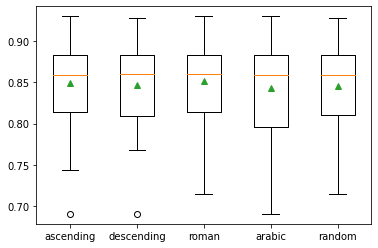

In [ ]:
df3_imput = optimize_IterativeImputer_imputer(Clev_switz_df,'num','Clev+Switz')

In [ ]:
df3_imput.loc[df3_imput['Mean_Accuracy'] == df3_imput['Mean_Accuracy'].max()] 

Name ImputationOrder  Mean_Accuracy   std_Dev
2  Clev+Switz           roman       0.852178  0.058069

###**4. Iterative imputation on Cleveland + Hungarian + Switzerland**

Name ImputationOrder  Mean_Accuracy   std_Dev
0  Cleve+Hung+Switz       ascending       0.835185  0.031820
1  Cleve+Hung+Switz      descending       0.837500  0.033285
2  Cleve+Hung+Switz           roman       0.838426  0.032569
3  Cleve+Hung+Switz          arabic       0.835648  0.031074
4  Cleve+Hung+Switz          random       0.839352  0.035804

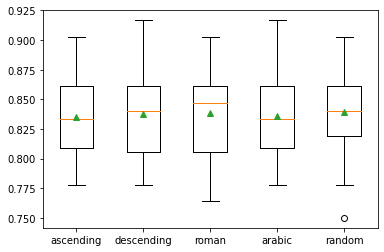

In [ ]:
df4_imput=optimize_IterativeImputer_imputer(Clev_hung_switz_df,'num','Cleve+Hung+Switz')

In [ ]:
df4_imput.loc[df4_imput['Mean_Accuracy'] == df4_imput['Mean_Accuracy'].max()] 

Name ImputationOrder  Mean_Accuracy   std_Dev
4  Cleve+Hung+Switz          random       0.839352  0.035804

###**5. Iterative imputation on Cleveland**

Name ImputationOrder  Mean_Accuracy   std_Dev
0  Cleveland       ascending       0.822832  0.051771
1  Cleveland      descending       0.825125  0.054857
2  Cleveland           roman       0.825018  0.056223
3  Cleveland          arabic       0.826129  0.054580
4  Cleveland          random       0.813943  0.049886

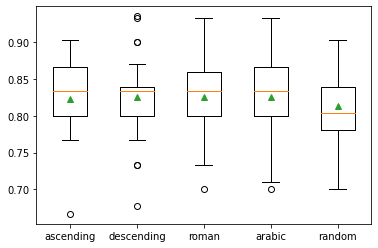

In [ ]:
df5_imput=optimize_IterativeImputer_imputer(cleveland_df,'num','Cleveland')

In [ ]:
df5_imput.loc[df5_imput['Mean_Accuracy'] == df5_imput['Mean_Accuracy'].max()] 

Name ImputationOrder  Mean_Accuracy  std_Dev
3  Cleveland          arabic       0.826129  0.05458

## **Final KNN Imputation results**

---



####**Printing a Dataframe for KNN imputer results**

In [ ]:
df1_max = df1.loc[df1.sort_values(by='K', ascending=False)['MeanAccuracy'] == df1.sort_values(by='K', ascending=False)['MeanAccuracy'].max()] 
df2_max = df2.loc[df2.sort_values(by='K', ascending=False)['MeanAccuracy'] == df2.sort_values(by='K', ascending=False)['MeanAccuracy'].max()] 
df3_max  = df3.loc[df3.sort_values(by='K', ascending=False)['MeanAccuracy'] == df3.sort_values(by='K', ascending=False)['MeanAccuracy'].max()] 
df4_max  = df4.loc[df4.sort_values(by='K', ascending=False)['MeanAccuracy'] == df4.sort_values(by='K', ascending=False)['MeanAccuracy'].max()] 
df5_max  = df5.loc[df5.sort_values(by='K', ascending=False)['MeanAccuracy'] == df5.sort_values(by='K', ascending=False)['MeanAccuracy'].max()] 

Optimum_df = pd.concat([df1_max,df2_max,df3_max,df4_max,df5_max])
Optimum_df.reset_index().sort_values(by='MeanAccuracy', ascending=False, na_position='first')

index                                Name     K  MeanAccuracy  stdAccuracy
2     22               cleveland+switzerland  45.0      0.859930     0.057966
3     23     cleveland+hungarian+switzerland  47.0      0.848611     0.030503
1      1                 cleveland+hungarian   3.0      0.845923     0.038397
4     16                           cleveland  33.0      0.830609     0.051953
0     21  cleveland+hungarian+switzerland+va  43.0      0.830072     0.032303

####**Printing a Dataframe for Iterative imputer results**

In [ ]:
df1_imput_max = df1_imput.loc[df1_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'] == df1_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'].max()] 
df2_imput_max = df2_imput.loc[df2_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'] == df2_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'].max()] 
df3_imput_max  = df3_imput.loc[df3_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'] == df3_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'].max()] 
df4_imput_max  = df4_imput.loc[df4_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'] == df4_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'].max()] 
df5_imput_max  = df5_imput.loc[df5_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'] == df5_imput.sort_values(by='ImputationOrder', ascending=False)['Mean_Accuracy'].max()] 

Optimum_df_imput = pd.concat([df1_imput_max,df2_imput_max,df3_imput_max,df4_imput_max,df5_imput_max])
Optimum_df_imput.reset_index().sort_values(by='Mean_Accuracy', ascending=False, na_position='first')

index                        Name ImputationOrder  Mean_Accuracy   std_Dev
2      2                  Clev+Switz           roman       0.852178  0.058069
3      4            Cleve+Hung+Switz          random       0.839352  0.035804
1      2                   clev+hung           roman       0.834228  0.037421
4      3                   Cleveland          arabic       0.826129  0.054580
0      4  Clevel + Hung + Switz + VA          random       0.821014  0.030192

###**Final Imputed Dataset:** 
Imputation with KNN mean accuracy is higher with smallest std_dev.. so we will select the final imputed dataset Cleveland+Switzerland+Hungarian--- with K=3.

In [ ]:
# function to convert the  imputation results in a dataframe
def Final_Dataset_Prep(data, target , K):
    imputer = KNNImputer(n_neighbors=K, weights='distance', metric='nan_euclidean')
    array = data.values
    X = array[:,:-1]
    trans = MinMaxScaler()
    trans_X = trans.fit_transform(X)   
    X_imputed = imputer.fit_transform(trans_X)
    X_imputed_df = pd.DataFrame(X_imputed, columns=data.drop(target, axis=1).columns)

    data['num'][data.num >0] = 1
    Y_temp = data['num']
    Final_Dataset = pd.concat([d.reset_index(drop=True) for d in [X_imputed_df, Y_temp]], axis=1)
    return Final_Dataset

In [ ]:
# createing the final imputed dataset for the project (combining Cleveland, Hungarian, and Switzerland)
data = Clev_hung_switz_df
target = 'num'
K = 41

Final_DF = Final_Dataset_Prep(data,target,K)

In [ ]:
Final_DF.head(100)

age  sex     cp  trestbps   chol  ...  oldpeak  slope     ca  thal  num
0   0.714  1.0  0.000     0.542  0.286  ...    0.557    1.0  0.000  0.75    0
1   0.796  1.0  1.000     0.667  0.388  ...    0.466    0.5  1.000  0.00    1
2   0.796  1.0  1.000     0.333  0.278  ...    0.591    0.5  0.667  1.00    1
3   0.184  1.0  0.667     0.417  0.319  ...    0.693    1.0  0.000  0.00    0
4   0.265  0.0  0.333     0.417  0.230  ...    0.455    0.0  0.000  0.00    0
..    ...  ...    ...       ...    ...  ...      ...    ...    ...   ...  ...
95  0.490  1.0  1.000     0.400  0.328  ...    0.295    0.0  0.333  1.00    1
96  0.633  1.0  1.000     0.250  0.297  ...    0.432    0.5  0.333  1.00    1
97  0.653  0.0  1.000     0.583  0.334  ...    0.591    0.5  0.667  1.00    1
98  0.490  1.0  0.333     0.450  0.224  ...    0.386    0.0  0.333  0.00    0
99  0.408  1.0  1.000     0.350  0.264  ...    0.295    0.0  0.000  0.00    0

[100 rows x 14 columns]

In [ ]:
Final_DF.shape

(720, 14)

In [ ]:
#checking for the missing values in the final dataset
final_df_nan = pd.DataFrame(Final_DF.isnull().sum())
final_df_nan

0
age       0
sex       0
cp        0
trestbps  0
chol      0
fbs       0
restecg   0
thalach   0
exang     0
oldpeak   0
slope     0
ca        0
thal      0
num       0

**Missing values:** No missing values in the final dataset

In [ ]:
#checking duplicate rows in final dataset:
dups_final_df=Final_DF.duplicated()
print(dups_final_df.any())
print(Final_DF[dups_final_df])

True
       age  sex     cp  trestbps   chol  ...  oldpeak  slope     ca   thal  num
405  0.429  0.0  0.333     0.250  0.297  ...    0.295  0.205  0.104  0.054    0
599  0.143  1.0  1.000     0.333  0.218  ...    0.477  0.500  0.000  1.000    1

[2 rows x 14 columns]


**Duplicte rows**: there is a one duplicate row so we can remove it.

In [ ]:
# deleting the duplicate rows from the final dataset

In [ ]:
# drops the duplicate and inplace will save changes in the same file
Final_DF.drop_duplicates(inplace=True)
Final_DF.shape

(718, 14)

In [ ]:
Final_DF

age  sex     cp  trestbps   chol  ...  oldpeak  slope     ca   thal  num
0    0.714  1.0  0.000     0.542  0.286  ...    0.557    1.0  0.000  0.750    0
1    0.796  1.0  1.000     0.667  0.388  ...    0.466    0.5  1.000  0.000    1
2    0.796  1.0  1.000     0.333  0.278  ...    0.591    0.5  0.667  1.000    1
3    0.184  1.0  0.667     0.417  0.319  ...    0.693    1.0  0.000  0.000    0
4    0.265  0.0  0.333     0.417  0.230  ...    0.455    0.0  0.000  0.000    0
..     ...  ...    ...       ...    ...  ...      ...    ...    ...    ...  ...
715  0.857  1.0  1.000     0.292  0.340  ...    0.295    0.5  0.351  1.000    1
716  0.857  1.0  1.000     0.500  0.383  ...    0.523    0.5  0.331  1.000    1
717  0.898  1.0  0.667     0.667  0.309  ...    0.477    0.5  0.667  0.632    0
718  0.918  0.0  0.667     0.667  0.355  ...    0.295    0.0  0.140  0.000    1
719  0.939  1.0  0.333     0.542  0.299  ...    0.443    0.0  0.212  0.424    1

[718 rows x 14 columns]

In [ ]:
Final_DF.to_csv(r'.\Final_Dataset.csv', index = False, header=True)

In [ ]:
#from google.colab import files
#Final_DF.to_csv('Final_imputed.csv') 
#files.download('Final_imputed.csv')

#--------------------**Analyze the  imputed data**--------------------------

##**Descriptive analysis of imputed data**
* shape
* describe()
* correlation matrix using "pearson"
* Output class distribution
* skewness of the attributes 



In [ ]:
#Shape of the Final imputed datatypes
# age -- original data
Final_DF.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [ ]:
#summary of the statisitcs 
from pandas import set_option
set_option('display.width',100)
pd.set_option('precision',3)
Final_DF.describe()

age      sex       cp  trestbps  ...    slope       ca     thal    num
count  718.000  718.000  718.000   718.000  ...  718.000  718.000  718.000  718.0
mean     0.488    0.740    0.727     0.432  ...    0.323    0.213    0.489    0.5
std      0.187    0.439    0.318     0.154  ...    0.255    0.217    0.403    0.5
min      0.000    0.000    0.000     0.000  ...    0.000    0.000    0.000    0.0
25%      0.347    0.000    0.333     0.333  ...    0.000    0.051    0.000    0.0
50%      0.510    1.000    1.000     0.417  ...    0.329    0.158    0.520    0.5
75%      0.612    1.000    1.000     0.500  ...    0.500    0.319    0.889    1.0
max      1.000    1.000    1.000     1.000  ...    1.000    1.000    1.000    1.0

[8 rows x 14 columns]

In [ ]:
#correlation between the attributes
from pandas import set_option
#set_option('display.width')
pd.set_option('precision',3)

print(Final_DF.corr(method='pearson'))

            age    sex     cp  trestbps  ...  slope     ca   thal    num
age       1.000 -0.026  0.162     0.252  ...  0.163  0.364  0.181  0.246
sex      -0.026  1.000  0.152    -0.011  ...  0.083  0.143  0.442  0.295
cp        0.162  0.152  1.000     0.004  ...  0.248  0.284  0.402  0.496
trestbps  0.252 -0.011  0.004     1.000  ...  0.051  0.102  0.115  0.101
chol      0.112 -0.069  0.103     0.099  ...  0.056  0.110  0.054  0.138
fbs       0.168  0.037  0.003     0.129  ...  0.076  0.168  0.082  0.072
restecg   0.232 -0.048  0.015     0.094  ...  0.046  0.161 -0.037  0.069
thalach  -0.338 -0.146 -0.341    -0.115  ... -0.361 -0.271 -0.343 -0.405
exang     0.145  0.154  0.422     0.129  ...  0.360  0.253  0.431  0.459
oldpeak   0.221  0.068  0.242     0.164  ...  0.426  0.302  0.309  0.376
slope     0.163  0.083  0.248     0.051  ...  1.000  0.182  0.348  0.376
ca        0.364  0.143  0.284     0.102  ...  0.182  1.000  0.347  0.443
thal      0.181  0.442  0.402     0.115  ...  0.348

In [ ]:
#class distribution to check balanced between two classes
print(Final_DF.groupby('num').size())

num
0    359
1    359
dtype: int64


data is balanced in this dataset

In [ ]:
#skew of univariate distribution
skew=Final_DF.skew()
print(skew)

age        -0.120
sex        -1.094
cp         -0.733
trestbps    0.661
chol        1.521
fbs         2.661
restecg     0.947
thalach    -0.335
exang       0.692
oldpeak     1.226
slope       0.469
ca          1.639
thal       -0.005
num         0.000
dtype: float64


#**Data visulization:**

*   Unimodal Data visulization
    * Histogram 
    * Density curve
    * Box plot
*   Multimodal Data visualization
    * Scatter plot
    * Correlation matrix

In [ ]:
#Histogram
def plot_hist(variable,df):
    dataset = df 
    sns.set_style('darkgrid')
    plt.figure(figsize = (9,3))
    
    
    sns.histplot(
        df,
        x=variable, hue="num",
        multiple="stack",
        palette="gist_rainbow",
        edgecolor=".3",
        linewidth=.9,
        #log_scale=True,
    )

    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

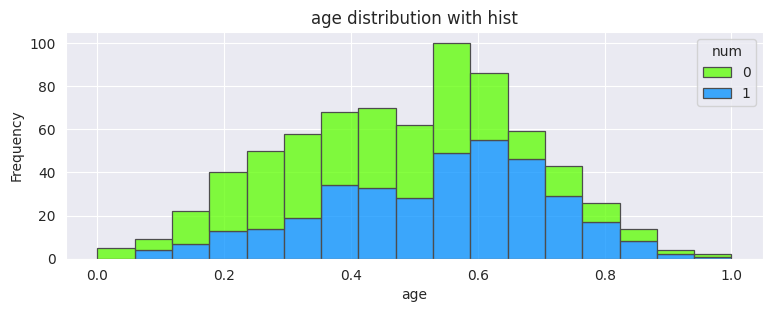

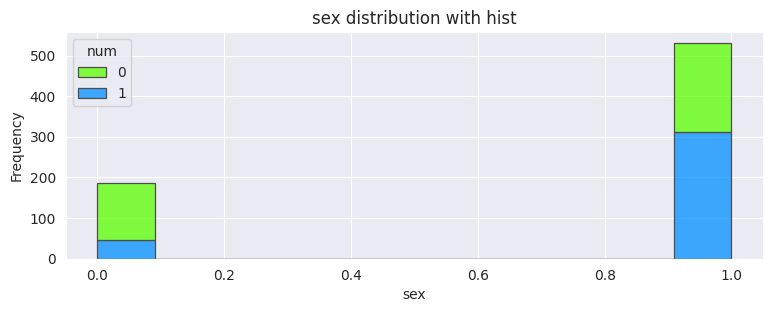

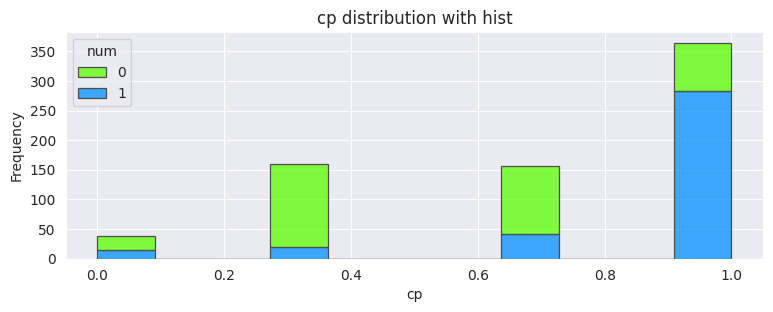

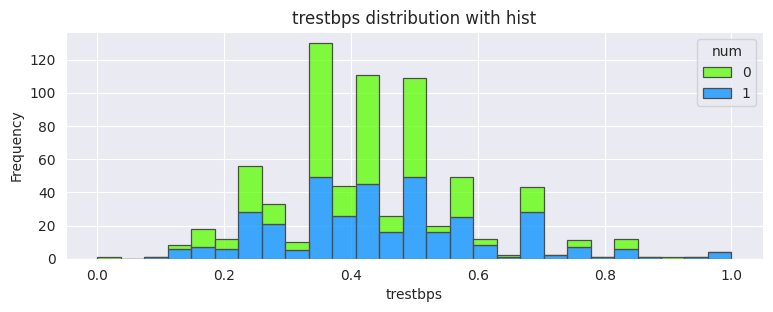

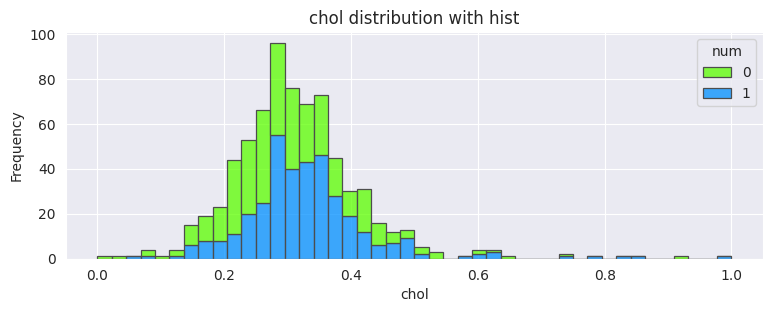

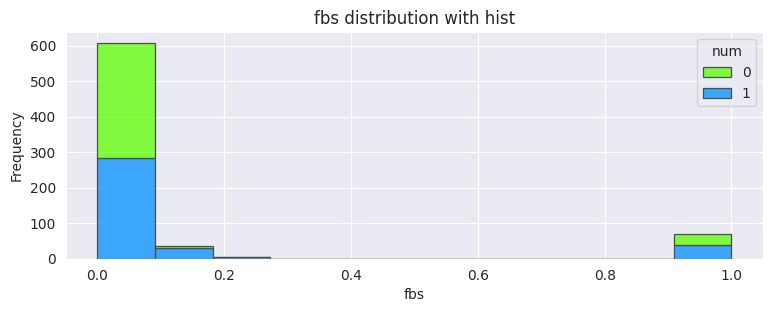

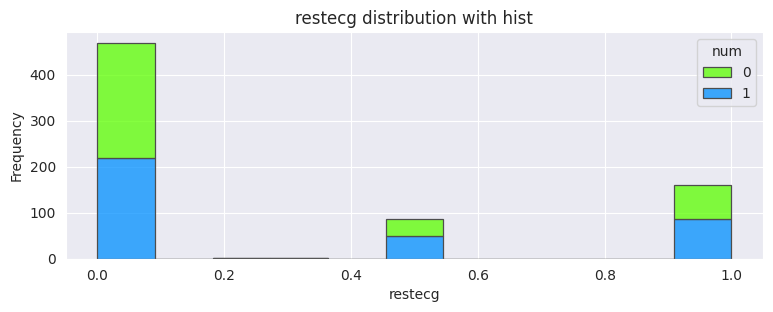

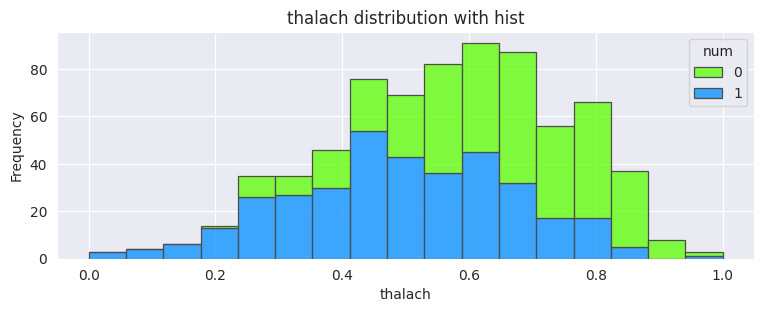

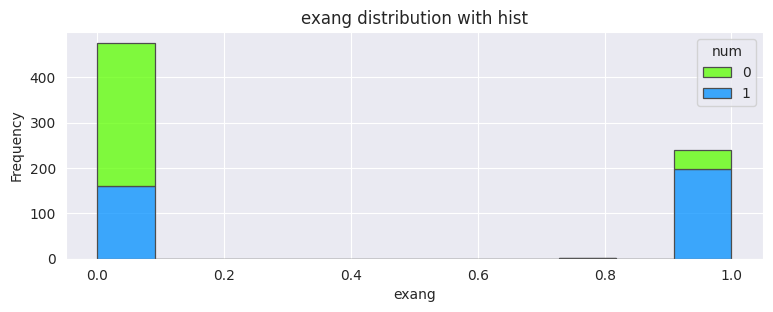

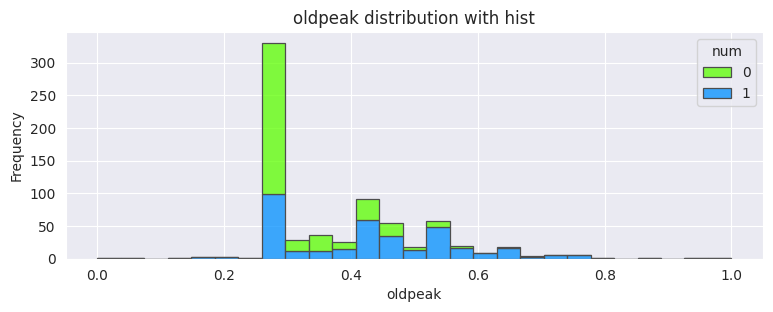

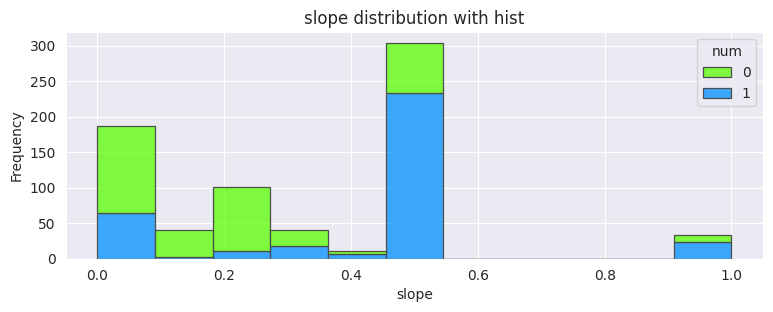

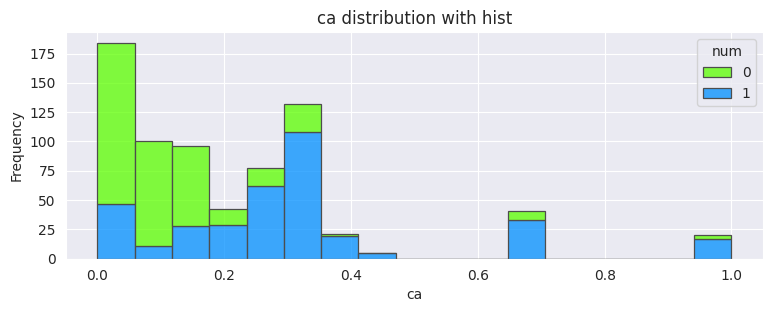

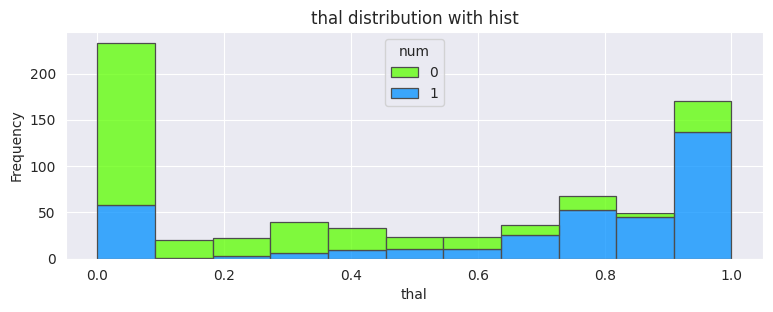

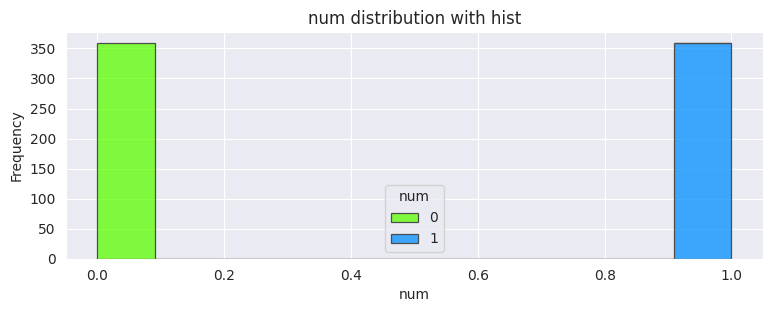

In [ ]:
for n in ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]:
    plot_hist(n,Final_DF)

In [ ]:
def plot_distribution(variable,df):
    dataset = df 
    sns.set_style('darkgrid')
    plt.figure(figsize = (9,3))
    #plt.hist(dataset[variable], bins = 50)
    sns.distplot(df[variable], rug=True, hist=True)
    #sns.distplot(Final_DF[Final_DF['num']==1][variable], rug=True, hist=True, label='1')
    #sns.distplot(Final_DF[Final_DF['num']==0][variable], rug=True, hist=True, label='0')
    plt.legend()
#plt.title('Density plot of age by sex');
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()



No handles with labels found to put in legend.


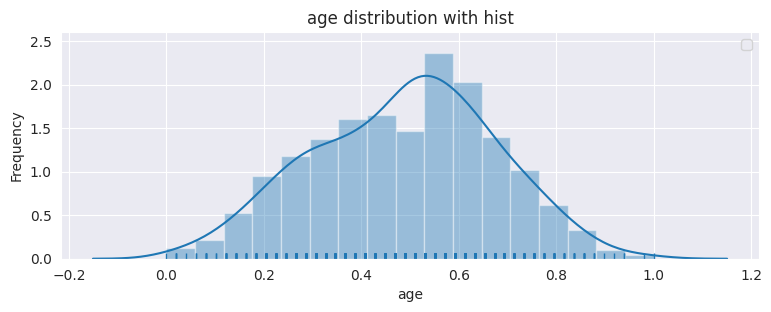

No handles with labels found to put in legend.


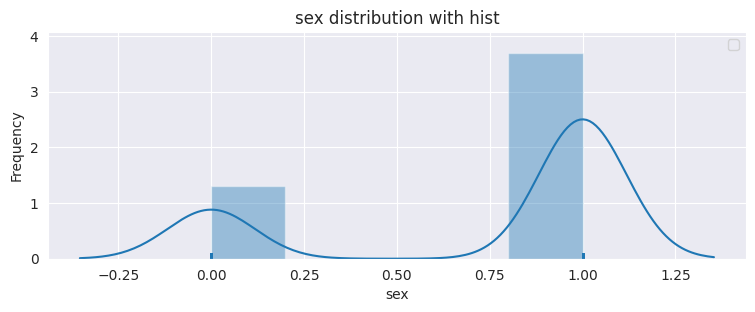

No handles with labels found to put in legend.


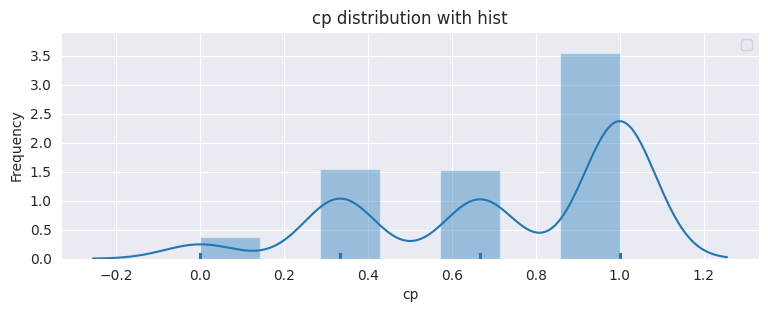

No handles with labels found to put in legend.


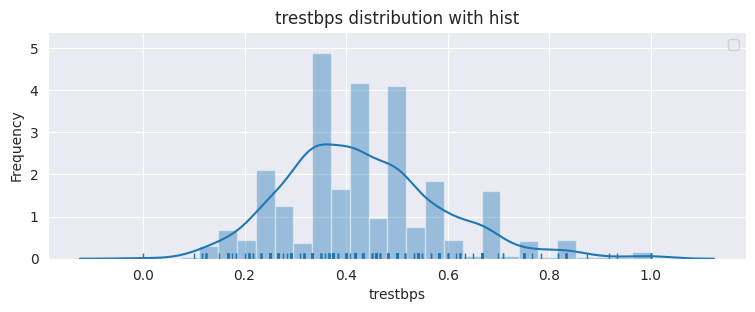

No handles with labels found to put in legend.


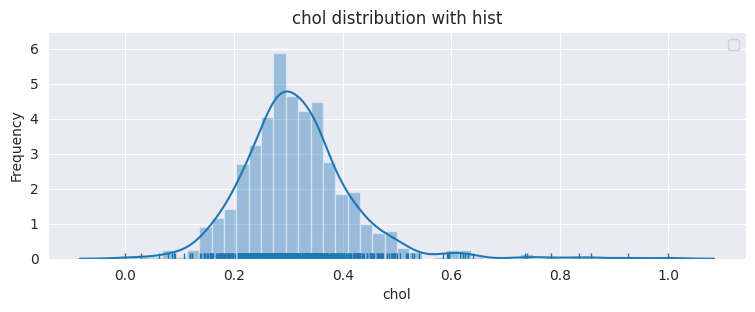

No handles with labels found to put in legend.


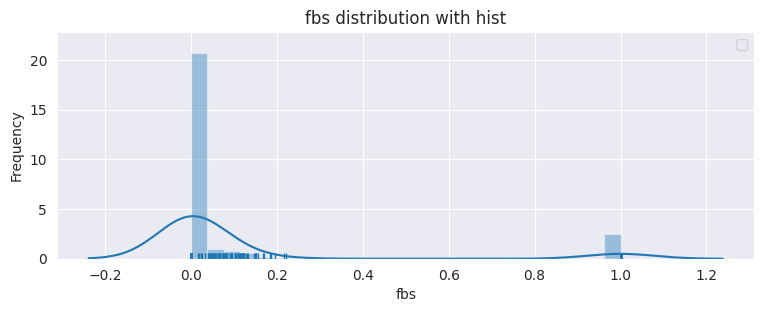

No handles with labels found to put in legend.


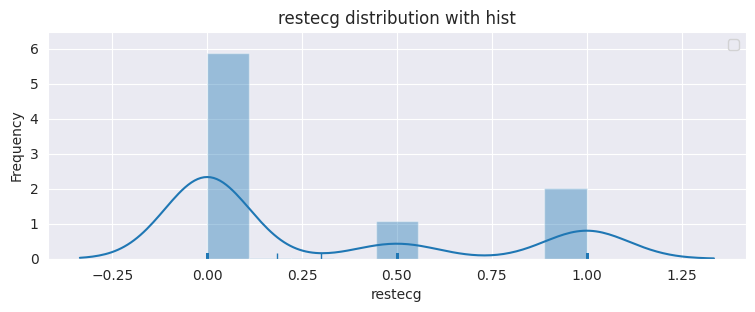

No handles with labels found to put in legend.


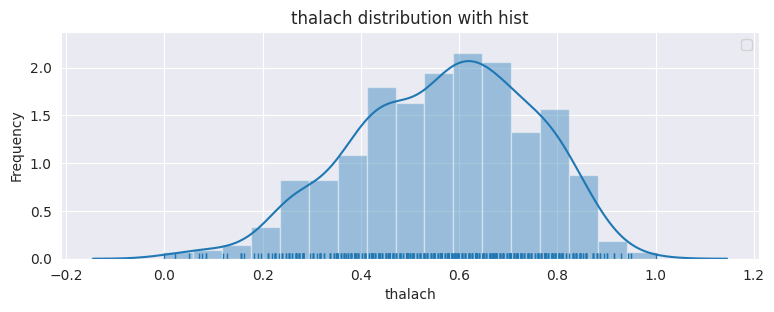

No handles with labels found to put in legend.


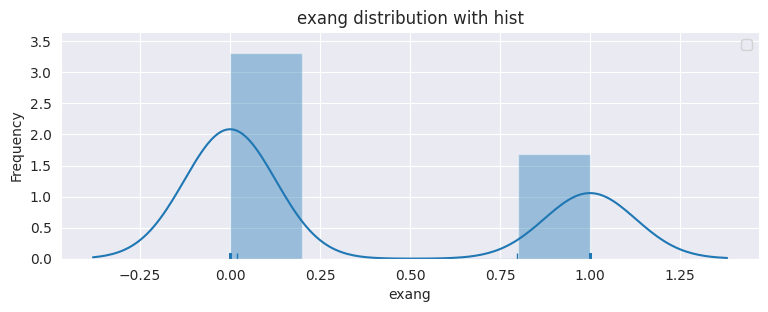

No handles with labels found to put in legend.


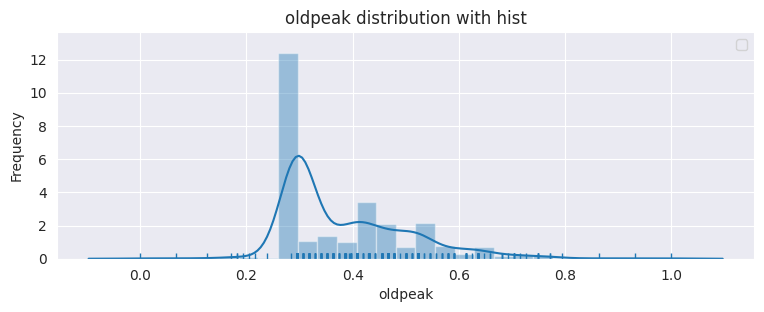

No handles with labels found to put in legend.


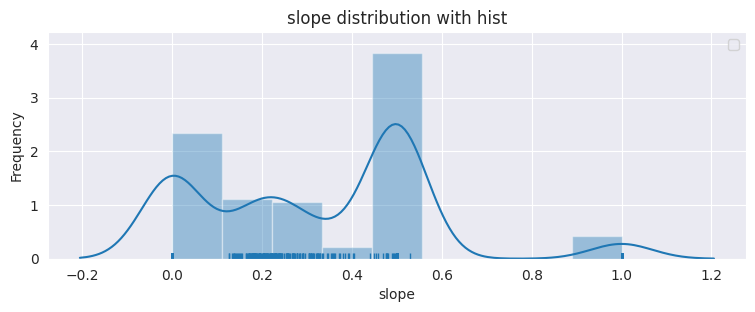

No handles with labels found to put in legend.


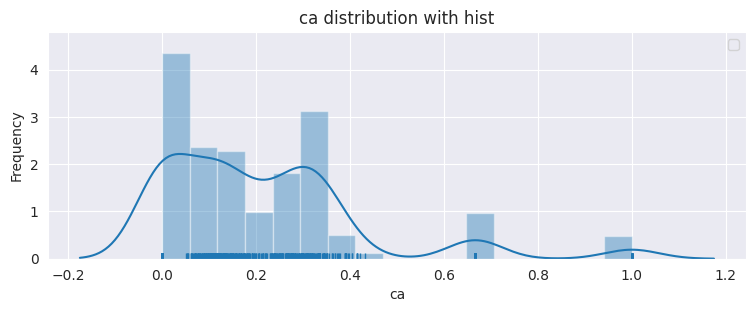

No handles with labels found to put in legend.


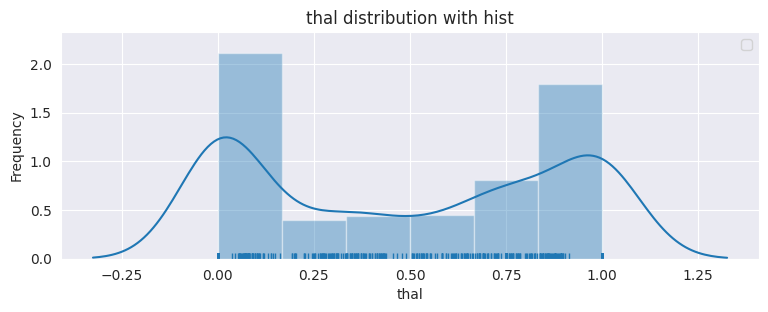

No handles with labels found to put in legend.


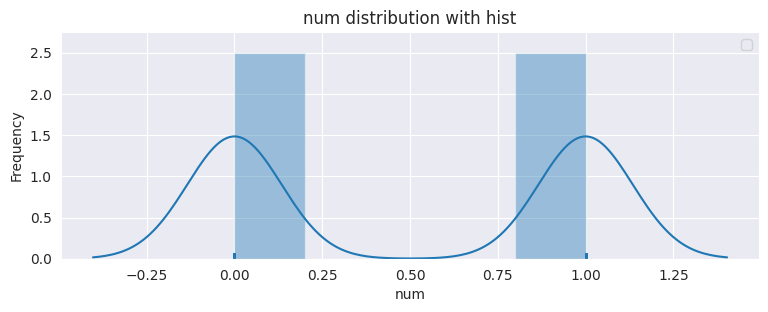

In [ ]:
for n in ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]:
    plot_distribution(n,Final_DF)

### Data is not normal, but it is balanced from the num.Hence, before modeling we need to rescale or transform the dataset 

In [ ]:
#Box plots
color1 = {
        "boxes": "DarkGreen",
        "whiskers": "DarkOrange",
        "medians": "red",
        "caps": "Gray",
        }
pyplot.rcParams.update({'figure.figsize':(10,15), 'figure.dpi':100})
ax = Final_DF.plot(kind='box',color=color1, subplots=True ,layout=(4,4),sharex=False, sharey=False , notch = True)
pyplot.xticks(fontsize = 16);
pyplot.yticks(fontsize = 4);
pyplot.show()
def boxplot_Matrix(labels, data):
    rows_list = []
    df = plt.boxplot(data,notch = True,labels = labels )
    for i in range(len(labels)):
        dict_Boxplot = {}
        dict_Boxplot['label'] = labels[i]
        dict_Boxplot['lower_whisker'] = df['whiskers'][i*2].get_ydata()[1]
        dict_Boxplot['lower_quartile'] = df['boxes'][i].get_ydata()[1]
        dict_Boxplot['median'] = df['medians'][i].get_ydata()[1]
        dict_Boxplot['upper_quartile'] = df['boxes'][i].get_ydata()[2]
        dict_Boxplot['upper_whisker'] = df['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict_Boxplot)

    return pd.DataFrame(rows_list)


### **Multimondal Data visualization**

<Figure size 6000x6000 with 0 Axes>

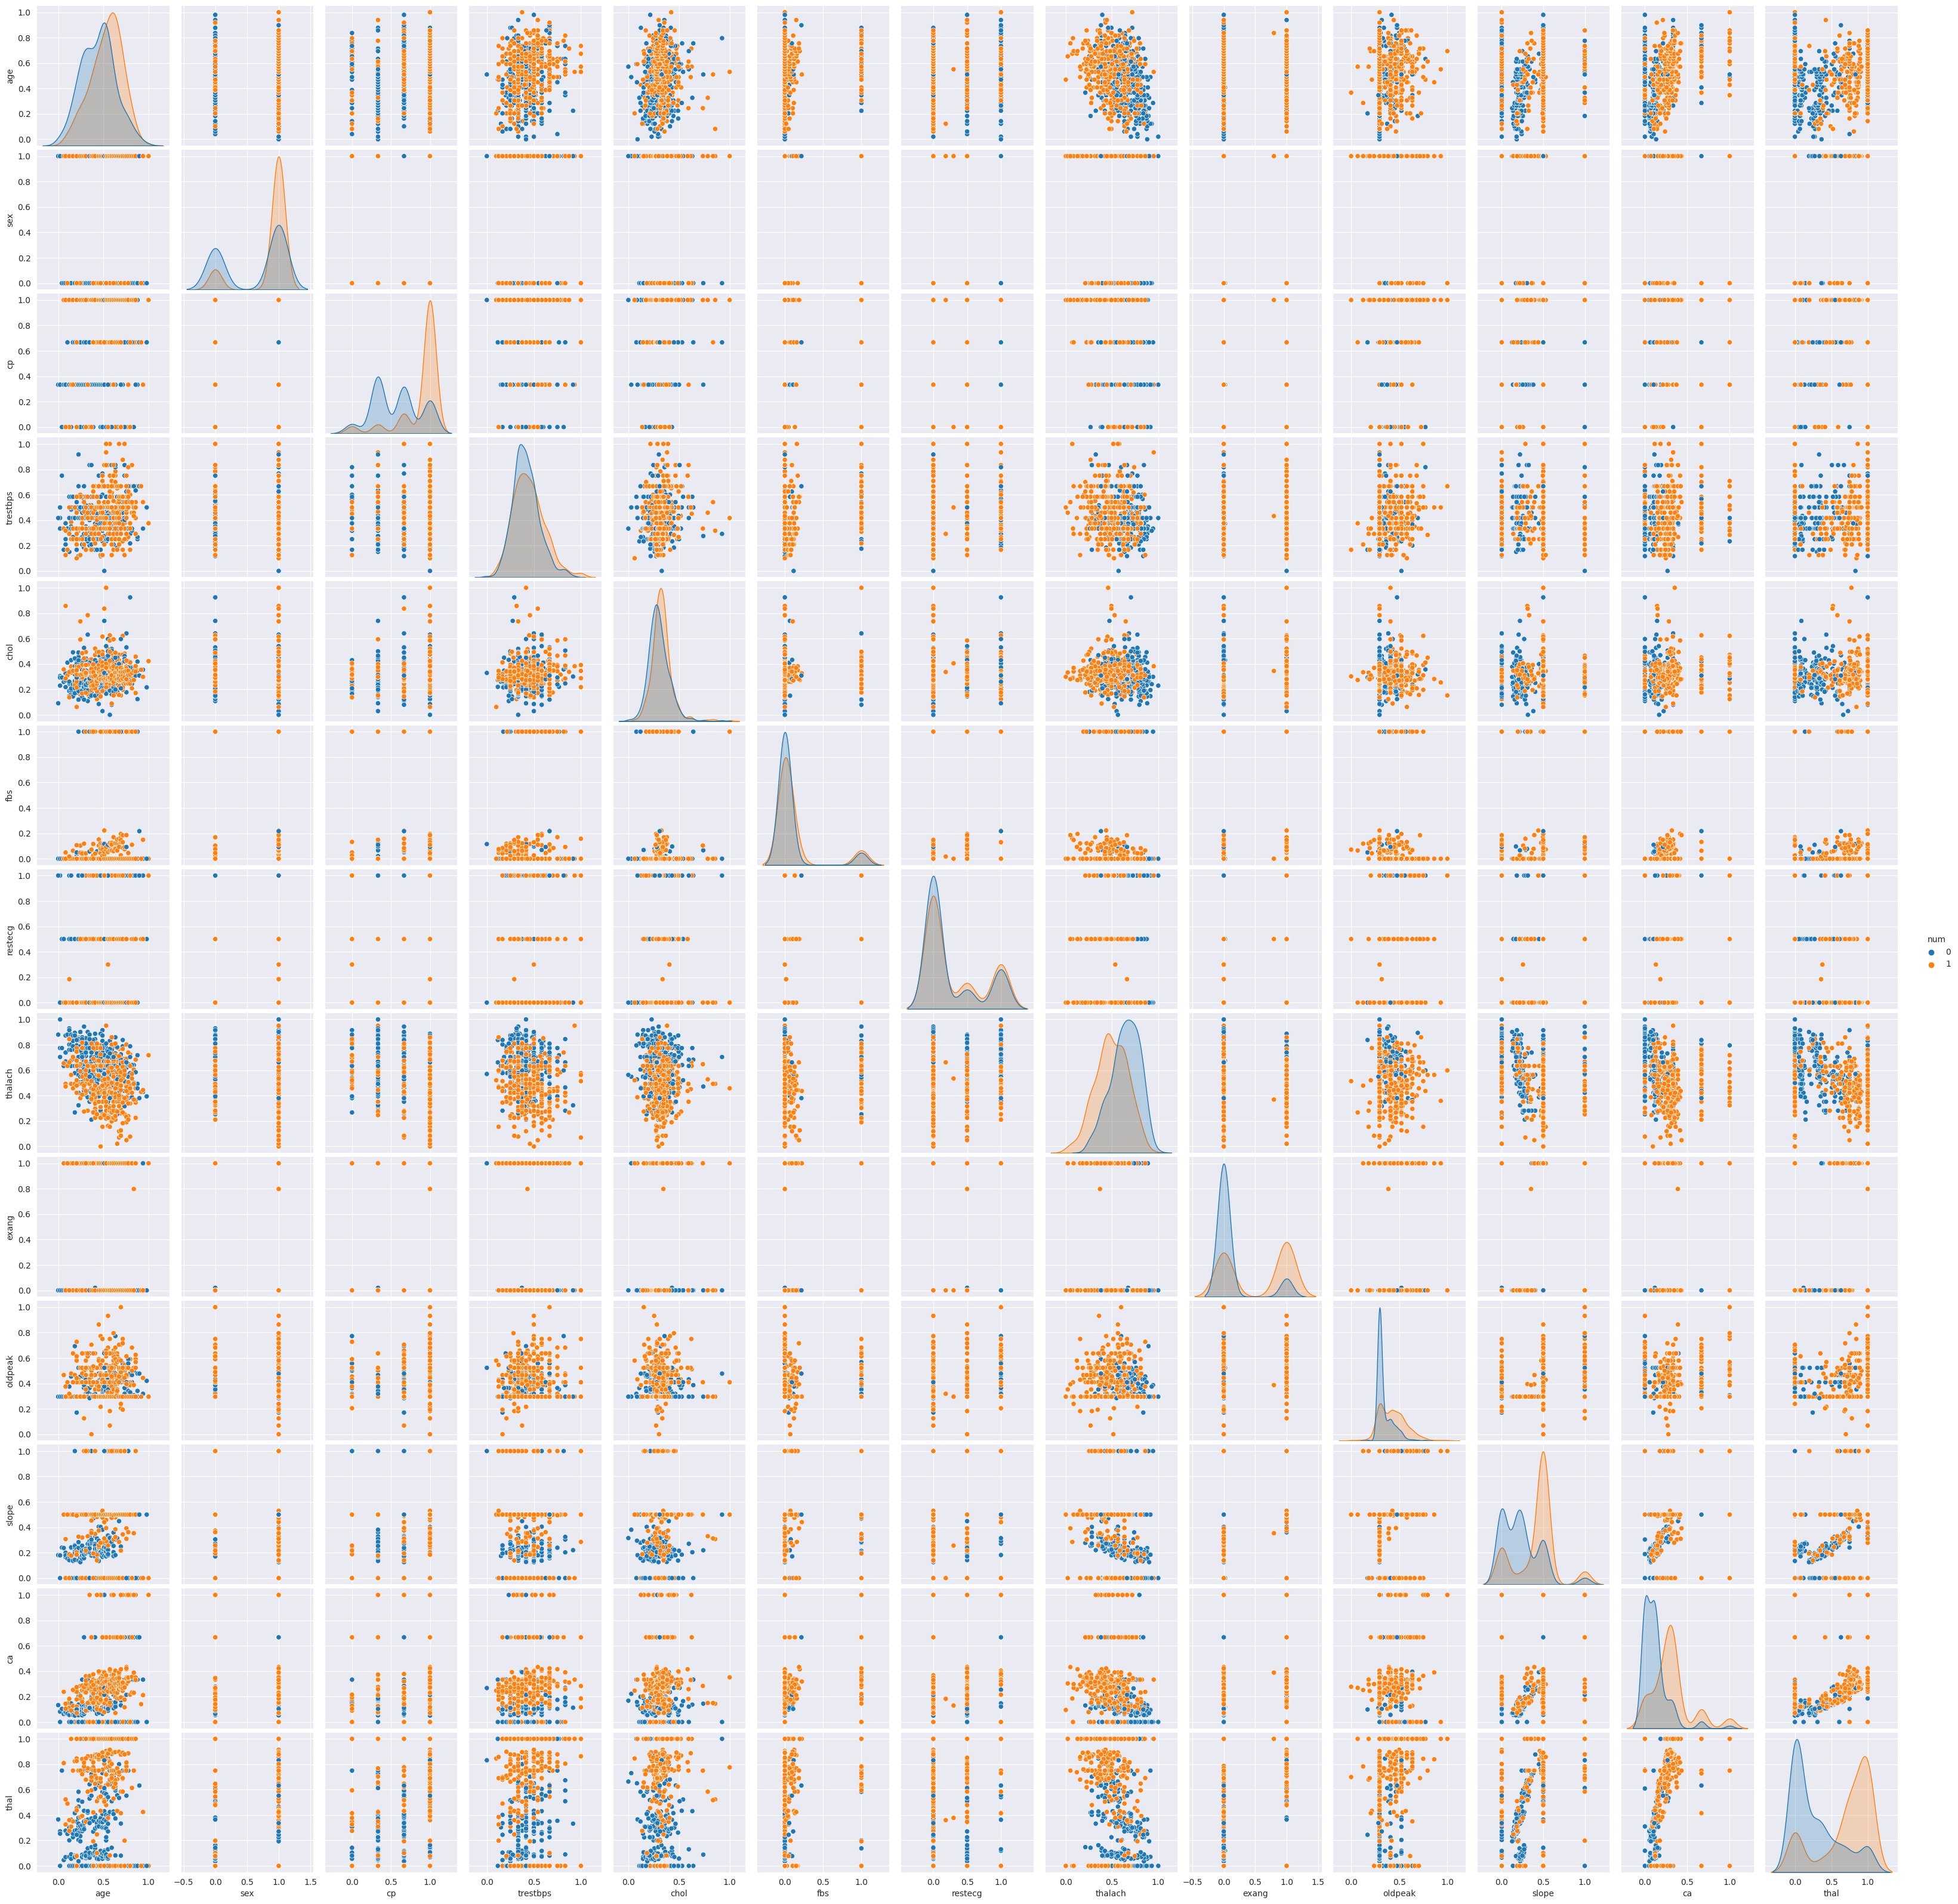

In [ ]:
#scatter plot matrix
#orange--- num=1, blue----num=0
plt.figure(figsize=(60,60))
sns.set_style('darkgrid')
sns.pairplot(Final_DF, hue='num')

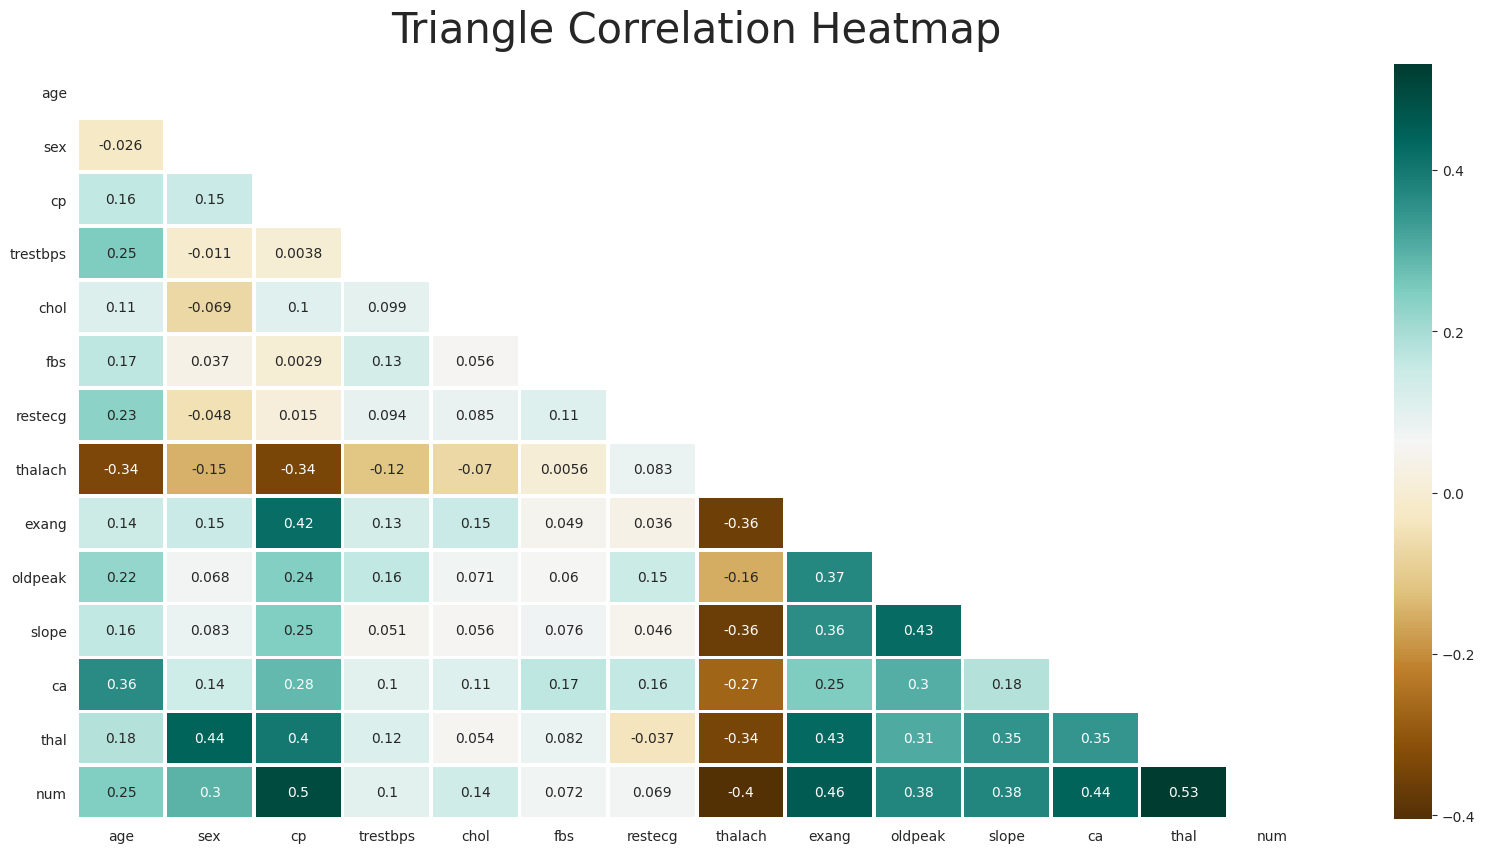

In [ ]:
#correlation matrix
plt.figure(figsize=(20, 10))
sns.set_style('white')
mask = np.triu(np.ones_like(Final_DF.corr(), dtype=np.bool))
heatmap = sns.heatmap(Final_DF.corr(), mask=mask,annot=True, cmap='BrBG', linewidths = 2)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':30}, pad=16);

# **Model Selection**
##**Baseline Mode using train-test split**
###**Spot check following algorithm**


1.   LogisticRegression
2.   KNeighborsClassifier
3.   Support Vector Machine
4.   Linear Discriminant Analysis 
5.   DecisionTreeClassifier
6.   Gaussian Naive Bayes
7.   Random Forest Classifier 
8.   Ada Boosting Classifier
9.   XG Boosting Classifier
10.  Bagging Classifier


In [ ]:
#Libaries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold

from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from tabulate import tabulate

from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier

#### **Function to calculate and print the different performance metrics on predicted values**

In [ ]:
#function to measure and print different performance metrics
def Print_Metrics(best_model,y_test,X_test,y_predict_test,X_train,y_train,modelName):
    print('\nModel performance on the test data set:')

    mse             = metrics.mean_squared_error(y_test, y_predict_test)
    logloss_test    = metrics.log_loss(y_test, y_predict_test)
    #accuracy_train = best_model.score(X_train, y_train)
    accuracy_test   = metrics.accuracy_score(y_test, y_predict_test)
    #accuracy_test2  = best_model.score(X_test, y_test)
    F1_test         = metrics.f1_score(y_test, y_predict_test)
    precision_test  = precision_score(y_test, y_predict_test, average='binary')
    precision_test2 = metrics.precision_score(y_test, y_predict_test)
    recall_test     = recall_score(y_test, y_predict_test, average='binary')
    auc_test        = metrics.roc_auc_score(y_test, y_predict_test)
    r2_test         = metrics.r2_score(y_test, y_predict_test)
   
        
    header = ["Metric", "Test"]
    table  = [
               ["logloss",   logloss_test],
               ["Test accuracy",  accuracy_test],
               ["precision", precision_test],
               ["F1",        F1_test],
               ["r2",        r2_test],
               ["AUC",       auc_test]
             ]
    
    result = {
        "logloss" : logloss_test,
        "Test accuracy":accuracy_test,
        "precision": precision_test,
        "F1":F1_test,
        "r2":r2_test,
        "AUC":auc_test
    }

    data = [[modelName, logloss_test,accuracy_test,precision_test,F1_test,r2_test,auc_test]]
    df_result = pd.DataFrame(data, columns = ['ModelName', 'logloss','Test accuracy','precision', 'F1', 'r2', 'AUC'])
    print(tabulate(table, header, tablefmt="fancy_grid"))
    return df_result

####**Function to evalute the prediction performance using ROC curve**

In [ ]:
# function to plot ROC curve
def evaluate(model, X_train,y_train, X_test, y_test):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
   
    plt.figure()
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange', label='Random Forest')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve (area = %0.2f)' % roc_auc)
    plt.legend(loc='best')
    plt.show()
    
    return roc_auc

#### **Function for confusion matrix**

In [ ]:
#function to print confusion matrix
def Confusion_Matrix(y_test, y_pred):
    print("Confusion Matrix : ",metrics.confusion_matrix(y_test, y_pred))
    clf_confusion = metrics.confusion_matrix(y_test, y_pred)
    #[row, column]
    TP = clf_confusion[1, 1]
    TN = clf_confusion[0, 0]
    FP = clf_confusion[0, 1]
    FN = clf_confusion[1, 0]

    print("Classification Accuracy : ",(TP + TN) / float(TP + TN + FP + FN))
    print("classification_error : ",(FP + FN) / float(TP + TN + FP + FN))
    print("sensitivity : ",TP / float(FN + TP))
    print("specificity : ",TN / (TN + FP))
    print("false_positive_rate : ",FP / float(TN + FP))
    print("precision : ",TP / float(TP + FP))

####**Function to plot importand features for each model during spot check**

In [ ]:
# Function to plot important features
def imp_feature(model):
    X_features = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]
    feature_imp = pd.Series(model.feature_importances_,index=X_features).sort_values(ascending=False)

    sns.barplot(x=feature_imp, y=feature_imp.index)
    # Add labels to your graph
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.legend()
    plt.show()

####**Train- Test split**

In [ ]:
#splitting the data into 70% train - 30% test
from sklearn.model_selection import train_test_split
y=Final_DF['num'] 
X=Final_DF[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

##**Model Selection**


1.   **Fit the model**
2.   **Predict the values**
3.   **Calculate different metrics:** logloss, accuracy, precision, F1, r2, and AUC     
4.   **Plot ROC curve**
5.   **Confusion matrix:** Classification Accuracy, classification_error, sensitivity, specificity, false_positive_rate, precision 
6.   **Important features for tree classifiers**

===========================Logistic Regression : LR================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 6.23623  │
├───────────────┼──────────┤
│ Test accuracy │ 0.819444 │
├───────────────┼──────────┤
│ precision     │ 0.838095 │
├───────────────┼──────────┤
│ F1            │ 0.818605 │
├───────────────┼──────────┤
│ r2            │ 0.27753  │
├───────────────┼──────────┤
│ AUC           │ 0.819811 │
╘═══════════════╧══════════╛



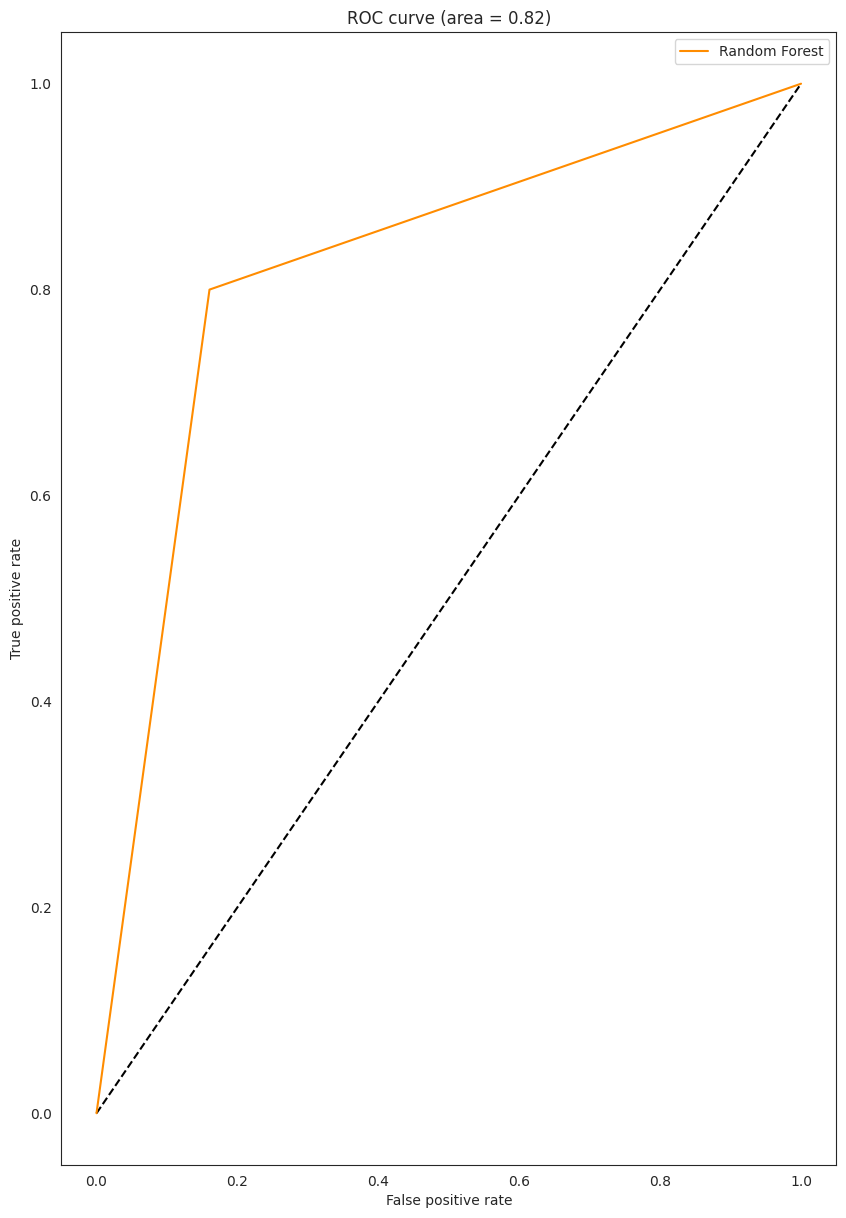

ROC for base model : Logistic Regression : LR : 0.819811320754717

Confusion Matrix : 
Confusion Matrix :  [[89 17]
 [22 88]]
Classification Accuracy :  0.8194444444444444
classification_error :  0.18055555555555555
sensitivity :  0.8
specificity :  0.839622641509434
false_positive_rate :  0.16037735849056603
precision :  0.8380952380952381

Imp Features : 

===========================Linear Discriminant Analysis : LDA ================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 5.59661  │
├───────────────┼──────────┤
│ Test accuracy │ 0.837963 │
├───────────────┼──────────┤
│ precision     │ 0.864078 │
├───────────────┼──────────┤
│ F1            │ 0.835681 │
├───────────────┼──────────┤
│ r2            │ 0.35163  │
├───────────────┼──────────┤
│ AUC           │ 0.838508 │
╘═══════════════╧══════════╛



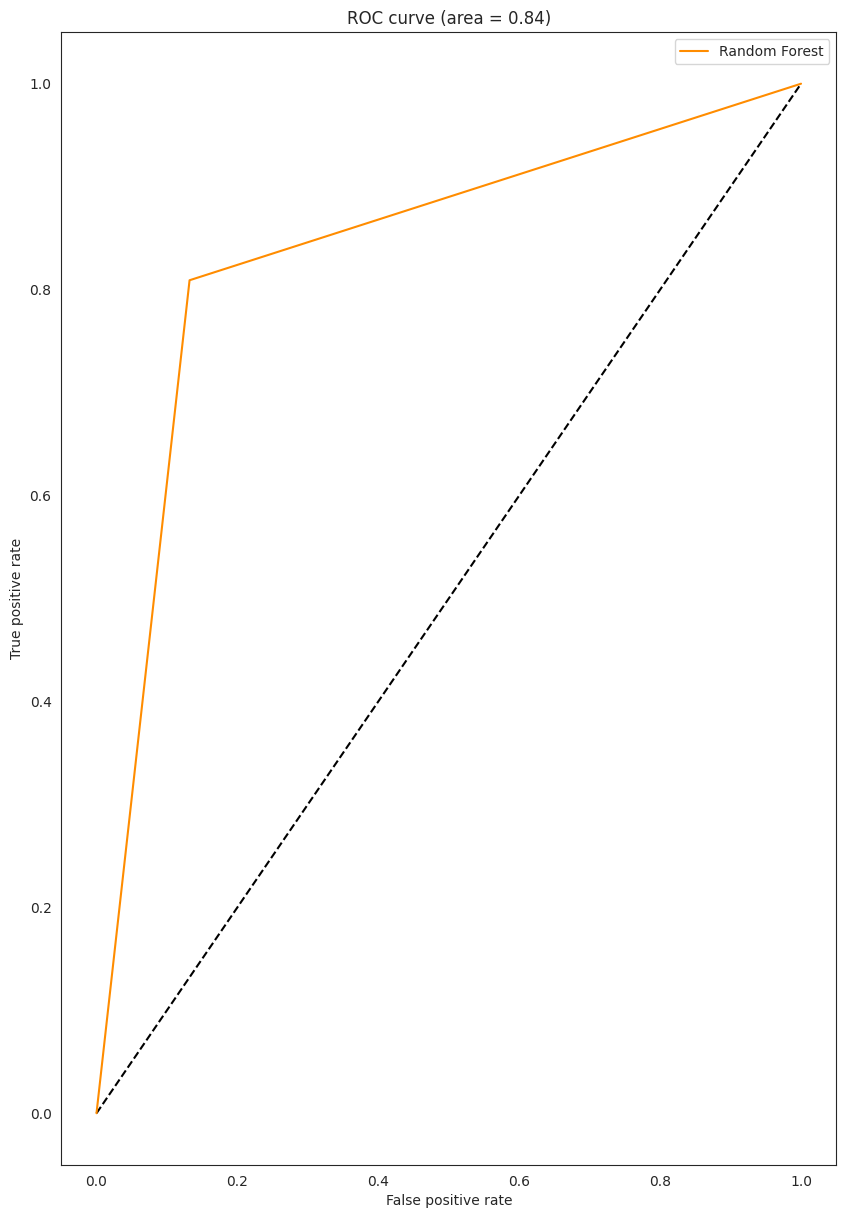

ROC for base model : Linear Discriminant Analysis : LDA  : 0.838507718696398

Confusion Matrix : 
Confusion Matrix :  [[92 14]
 [21 89]]
Classification Accuracy :  0.8379629629629629
classification_error :  0.16203703703703703
sensitivity :  0.8090909090909091
specificity :  0.8679245283018868
false_positive_rate :  0.1320754716981132
precision :  0.8640776699029126

Imp Features : 

===========================KNN================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 6.23623  │
├───────────────┼──────────┤
│ Test accuracy │ 0.819444 │
├───────────────┼──────────┤
│ precision     │ 0.838095 │
├───────────────┼──────────┤
│ F1            │ 0.818605 │
├───────────────┼──────────┤
│ r2            │ 0.27753  │
├───────────────┼──────────┤
│ AUC           │ 0.819811 │
╘═══════════════╧══════════╛



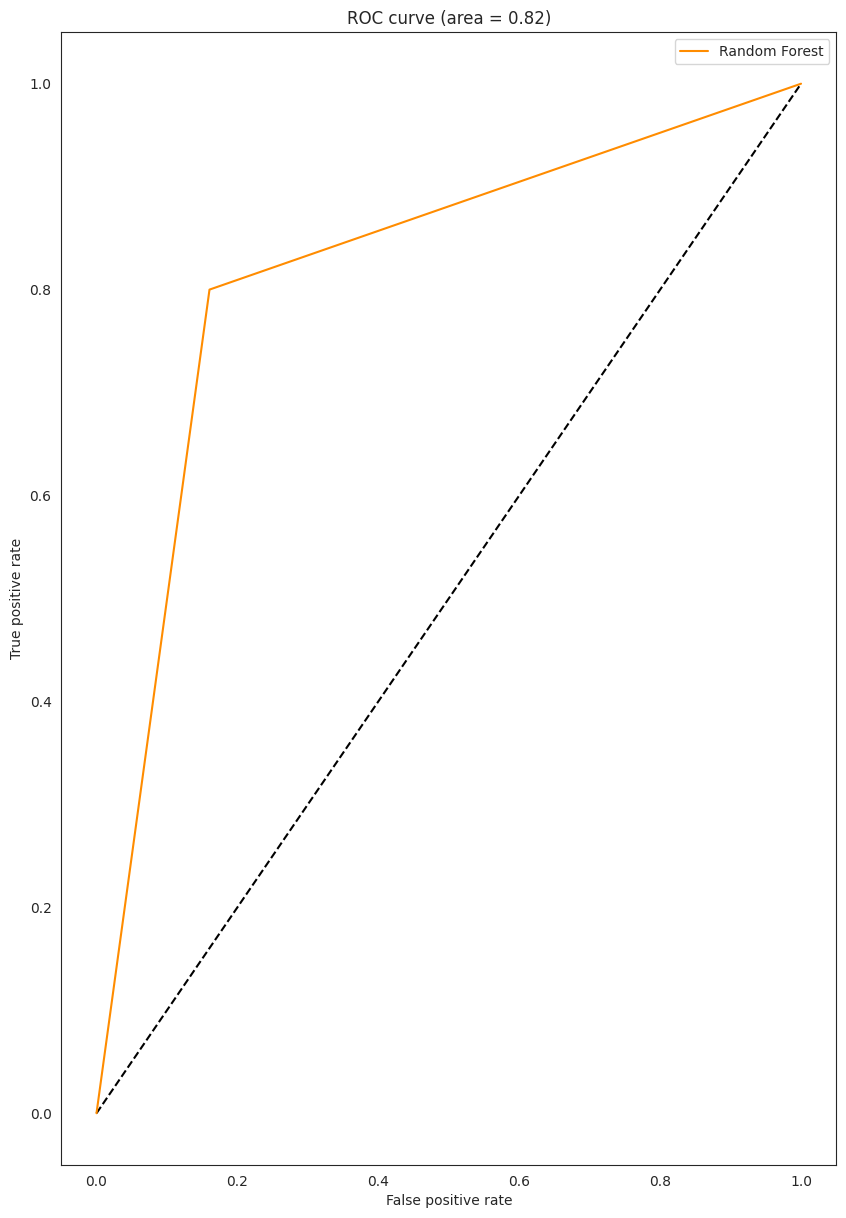

ROC for base model : KNN : 0.819811320754717

Confusion Matrix : 
Confusion Matrix :  [[89 17]
 [22 88]]
Classification Accuracy :  0.8194444444444444
classification_error :  0.18055555555555555
sensitivity :  0.8
specificity :  0.839622641509434
false_positive_rate :  0.16037735849056603
precision :  0.8380952380952381

Imp Features : 

===========================Decision Tree Classifier================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 7.03575  │
├───────────────┼──────────┤
│ Test accuracy │ 0.796296 │
├───────────────┼──────────┤
│ precision     │ 0.805556 │
├───────────────┼──────────┤
│ F1            │ 0.798165 │
├───────────────┼──────────┤
│ r2            │ 0.184906 │
├───────────────┼──────────┤
│ AUC           │ 0.796398 │
╘═══════════════╧══════════╛



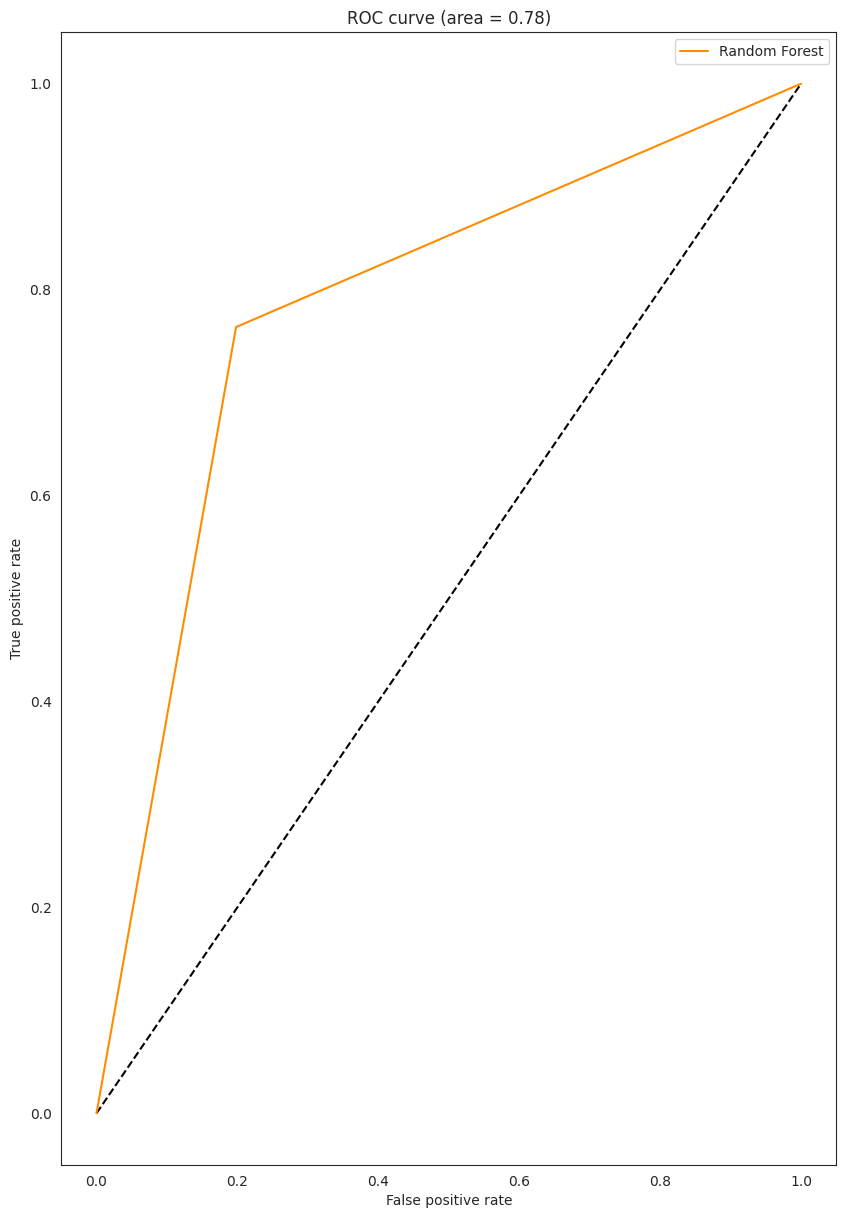

No handles with labels found to put in legend.


ROC for base model : Decision Tree Classifier : 0.7827615780445969

Confusion Matrix : 
Confusion Matrix :  [[85 21]
 [23 87]]
Classification Accuracy :  0.7962962962962963
classification_error :  0.2037037037037037
sensitivity :  0.7909090909090909
specificity :  0.8018867924528302
false_positive_rate :  0.19811320754716982
precision :  0.8055555555555556

Imp Features : 


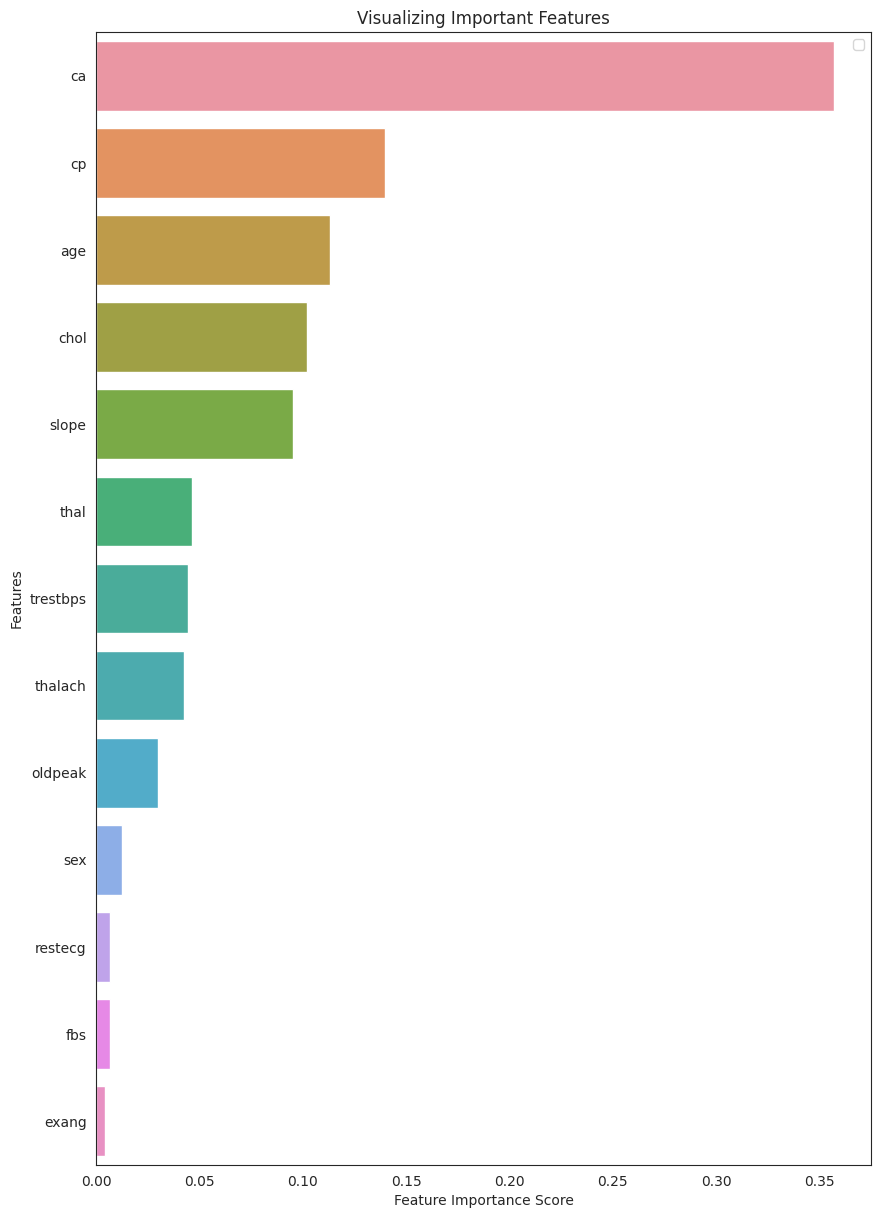

===========================GaussianNB : NB================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 6.23623  │
├───────────────┼──────────┤
│ Test accuracy │ 0.819444 │
├───────────────┼──────────┤
│ precision     │ 0.84466  │
├───────────────┼──────────┤
│ F1            │ 0.816901 │
├───────────────┼──────────┤
│ r2            │ 0.27753  │
├───────────────┼──────────┤
│ AUC           │ 0.819983 │
╘═══════════════╧══════════╛



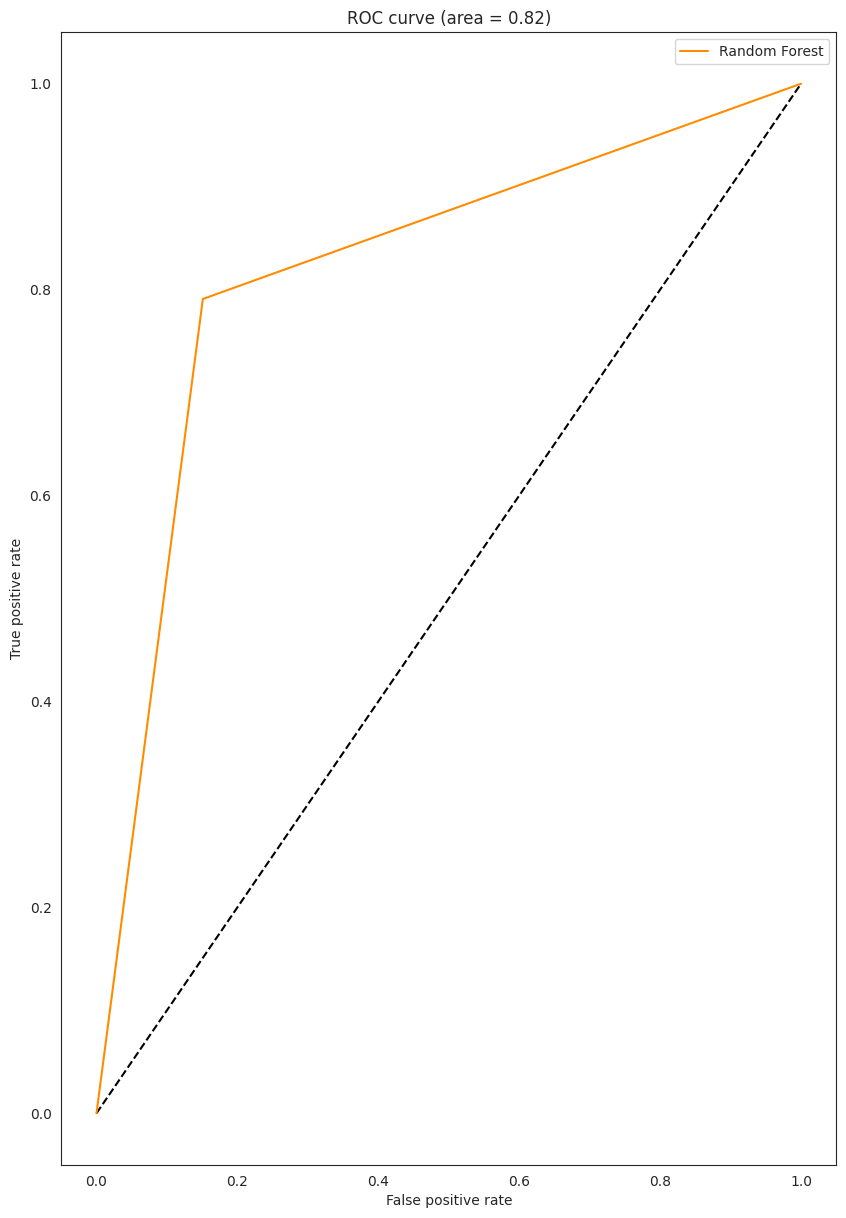

ROC for base model : GaussianNB : NB : 0.819982847341338

Confusion Matrix : 
Confusion Matrix :  [[90 16]
 [23 87]]
Classification Accuracy :  0.8194444444444444
classification_error :  0.18055555555555555
sensitivity :  0.7909090909090909
specificity :  0.8490566037735849
false_positive_rate :  0.1509433962264151
precision :  0.8446601941747572

Imp Features : 

===========================SVM================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 6.71594  │
├───────────────┼──────────┤
│ Test accuracy │ 0.805556 │
├───────────────┼──────────┤
│ precision     │ 0.820755 │
├───────────────┼──────────┤
│ F1            │ 0.805556 │
├───────────────┼──────────┤
│ r2            │ 0.221955 │
├───────────────┼──────────┤
│ AUC           │ 0.805832 │
╘═══════════════╧══════════╛



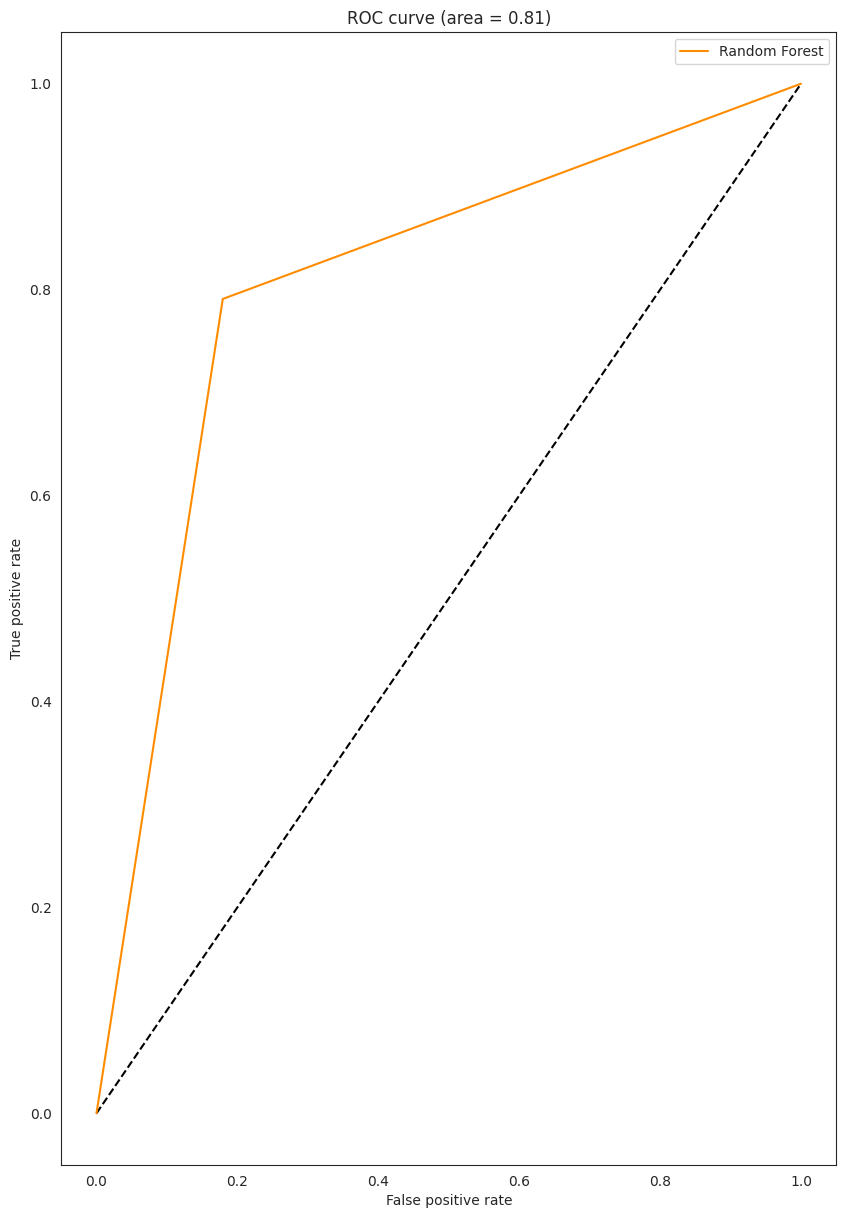

ROC for base model : SVM : 0.8058319039451116

Confusion Matrix : 
Confusion Matrix :  [[87 19]
 [23 87]]
Classification Accuracy :  0.8055555555555556
classification_error :  0.19444444444444445
sensitivity :  0.7909090909090909
specificity :  0.8207547169811321
false_positive_rate :  0.1792452830188679
precision :  0.8207547169811321

Imp Features : 

===========================Random Forest Classifier : RFC================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 5.75652  │
├───────────────┼──────────┤
│ Test accuracy │ 0.833333 │
├───────────────┼──────────┤
│ precision     │ 0.849057 │
├───────────────┼──────────┤
│ F1            │ 0.833333 │
├───────────────┼──────────┤
│ r2            │ 0.333105 │
├───────────────┼──────────┤
│ AUC           │ 0.833619 │
╘═══════════════╧══════════╛



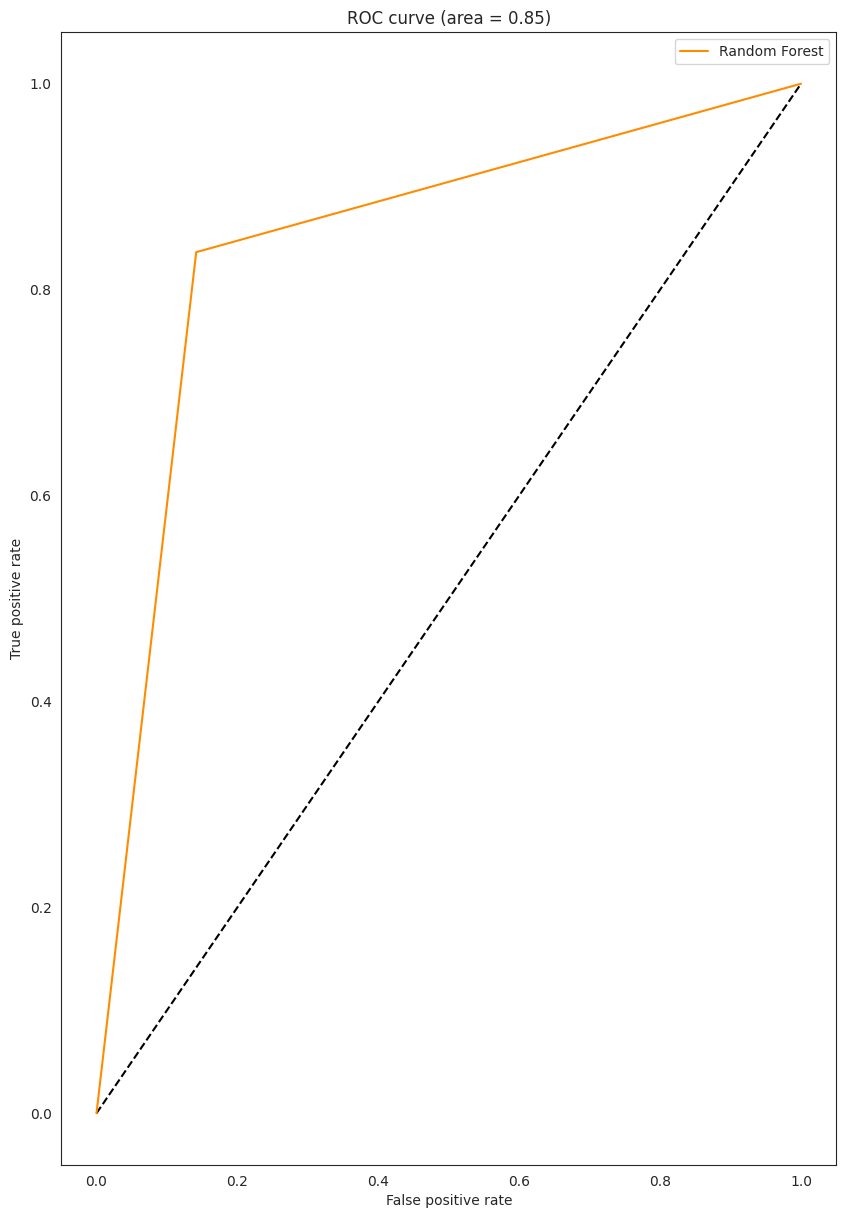

No handles with labels found to put in legend.


ROC for base model : Random Forest Classifier : RFC : 0.8474271012006861

Confusion Matrix : 
Confusion Matrix :  [[90 16]
 [20 90]]
Classification Accuracy :  0.8333333333333334
classification_error :  0.16666666666666666
sensitivity :  0.8181818181818182
specificity :  0.8490566037735849
false_positive_rate :  0.1509433962264151
precision :  0.8490566037735849

Imp Features : 


===========================Ada Boosting================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 5.91642  │
├───────────────┼──────────┤
│ Test accuracy │ 0.828704 │
├───────────────┼──────────┤
│ precision     │ 0.854369 │
├───────────────┼──────────┤
│ F1            │ 0.826291 │
├───────────────┼──────────┤
│ r2            │ 0.31458  │
├───────────────┼──────────┤
│ AUC           │ 0.829245 │
╘═══════════════╧══════════╛



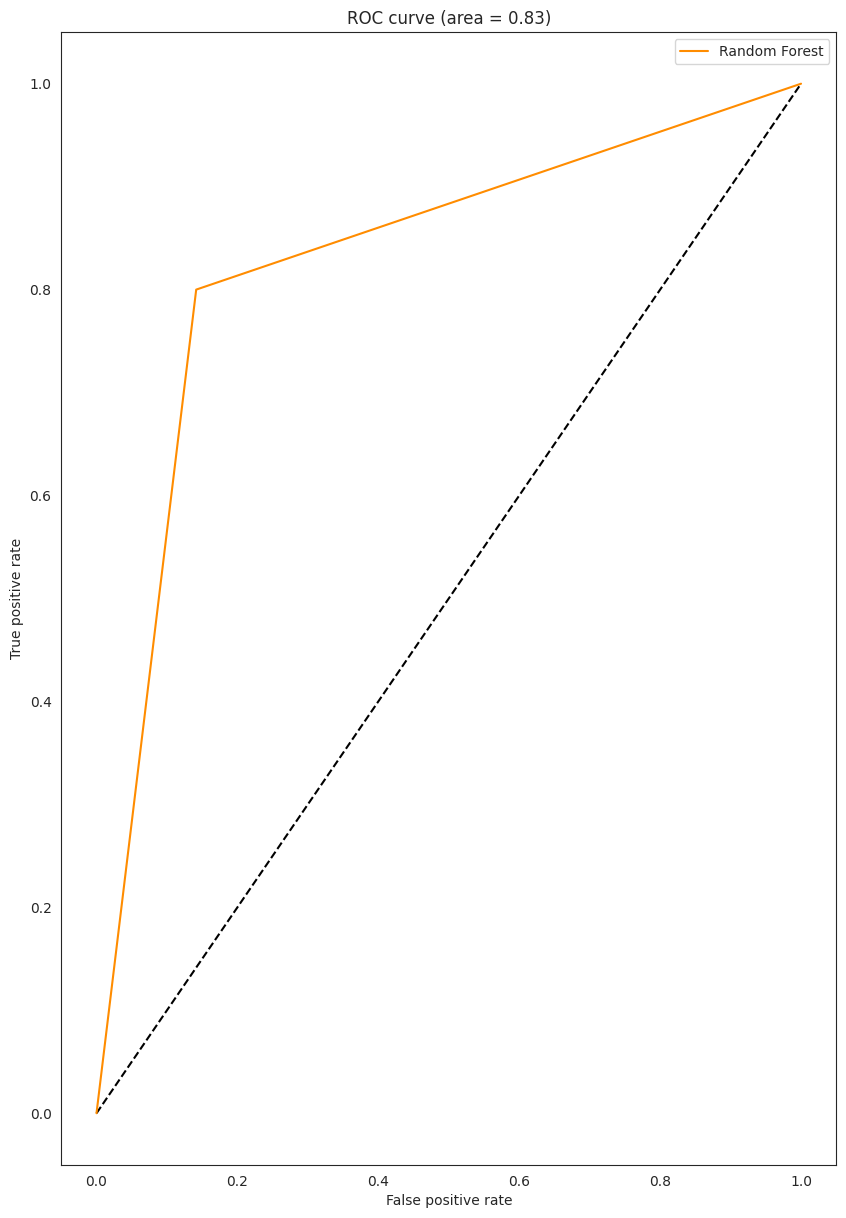

No handles with labels found to put in legend.


ROC for base model : Ada Boosting : 0.8292452830188679

Confusion Matrix : 
Confusion Matrix :  [[91 15]
 [22 88]]
Classification Accuracy :  0.8287037037037037
classification_error :  0.1712962962962963
sensitivity :  0.8
specificity :  0.8584905660377359
false_positive_rate :  0.14150943396226415
precision :  0.8543689320388349

Imp Features : 


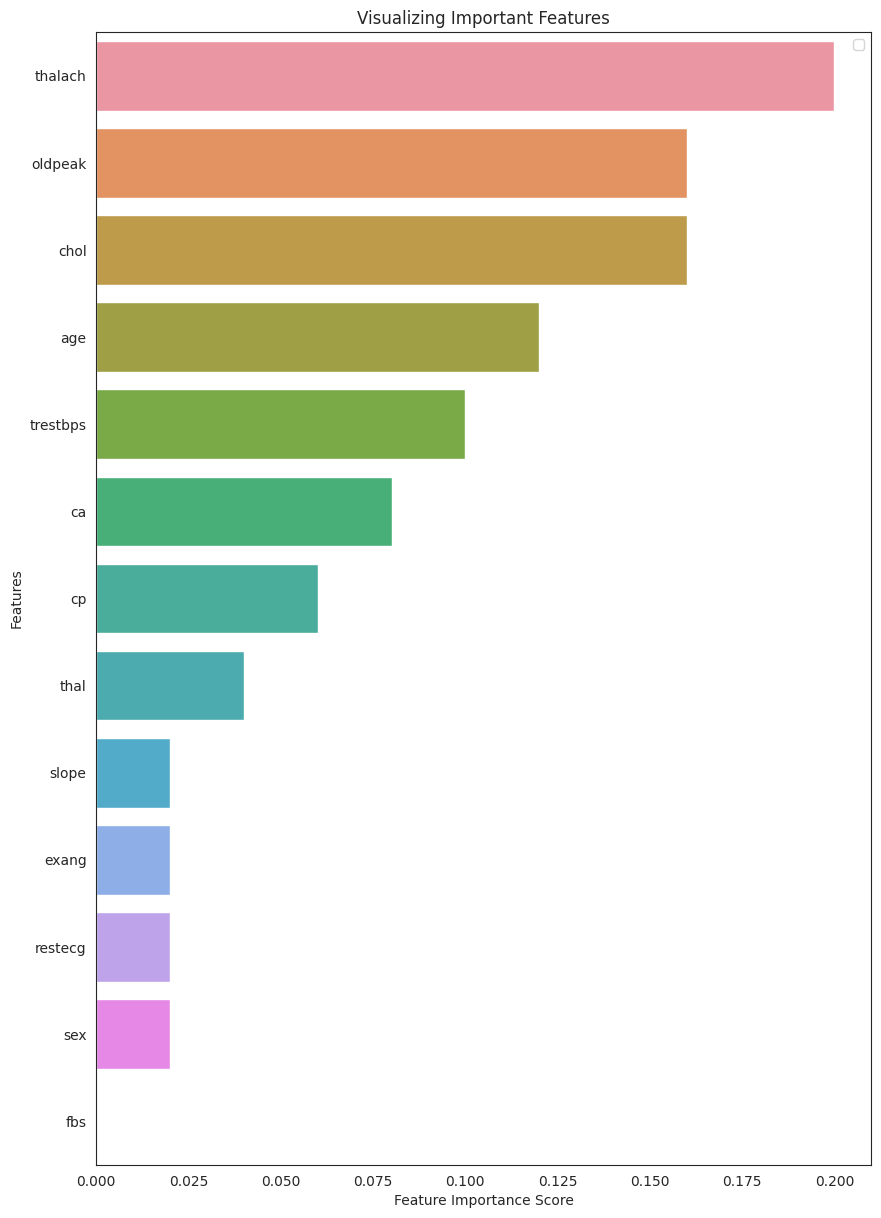

===========================XG Boosting================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 6.39613  │
├───────────────┼──────────┤
│ Test accuracy │ 0.814815 │
├───────────────┼──────────┤
│ precision     │ 0.843137 │
├───────────────┼──────────┤
│ F1            │ 0.811321 │
├───────────────┼──────────┤
│ r2            │ 0.259005 │
├───────────────┼──────────┤
│ AUC           │ 0.815437 │
╘═══════════════╧══════════╛



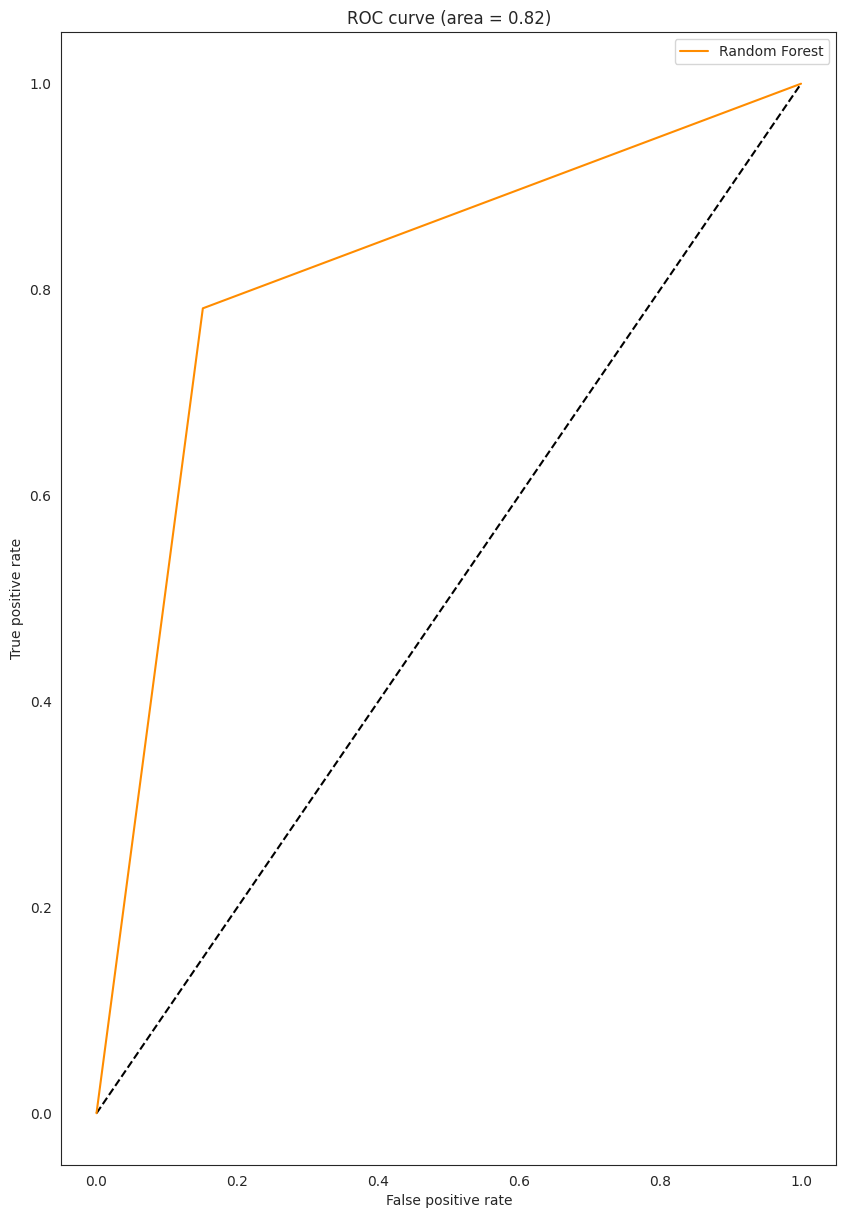

No handles with labels found to put in legend.


ROC for base model : XG Boosting : 0.8154373927958833

Confusion Matrix : 
Confusion Matrix :  [[90 16]
 [24 86]]
Classification Accuracy :  0.8148148148148148
classification_error :  0.18518518518518517
sensitivity :  0.7818181818181819
specificity :  0.8490566037735849
false_positive_rate :  0.1509433962264151
precision :  0.8431372549019608

Imp Features : 


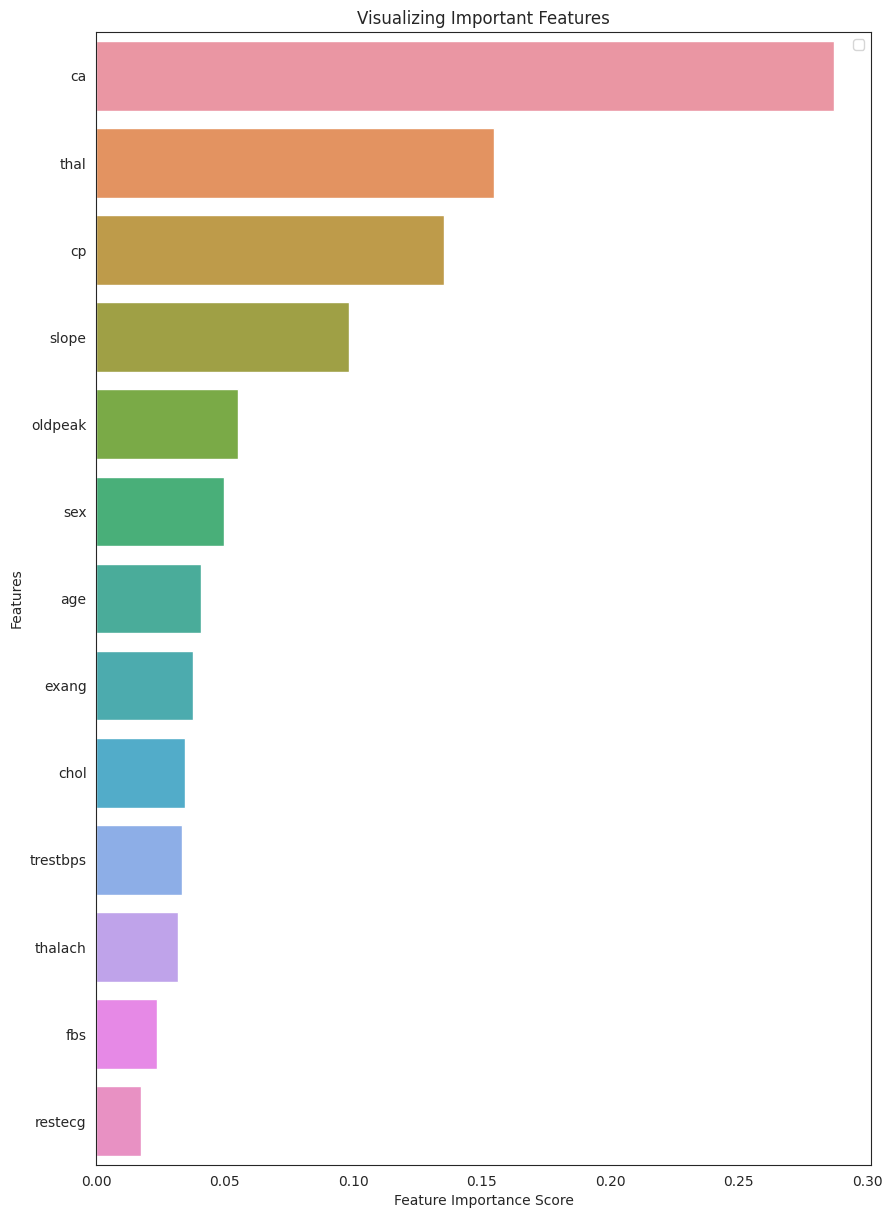

===========================bagging Classifier================================

Model performance on the test data set:
╒═══════════════╤══════════╕
│ Metric        │     Test │
╞═══════════════╪══════════╡
│ logloss       │ 6.39614  │
├───────────────┼──────────┤
│ Test accuracy │ 0.814815 │
├───────────────┼──────────┤
│ precision     │ 0.830189 │
├───────────────┼──────────┤
│ F1            │ 0.814815 │
├───────────────┼──────────┤
│ r2            │ 0.259005 │
├───────────────┼──────────┤
│ AUC           │ 0.815094 │
╘═══════════════╧══════════╛



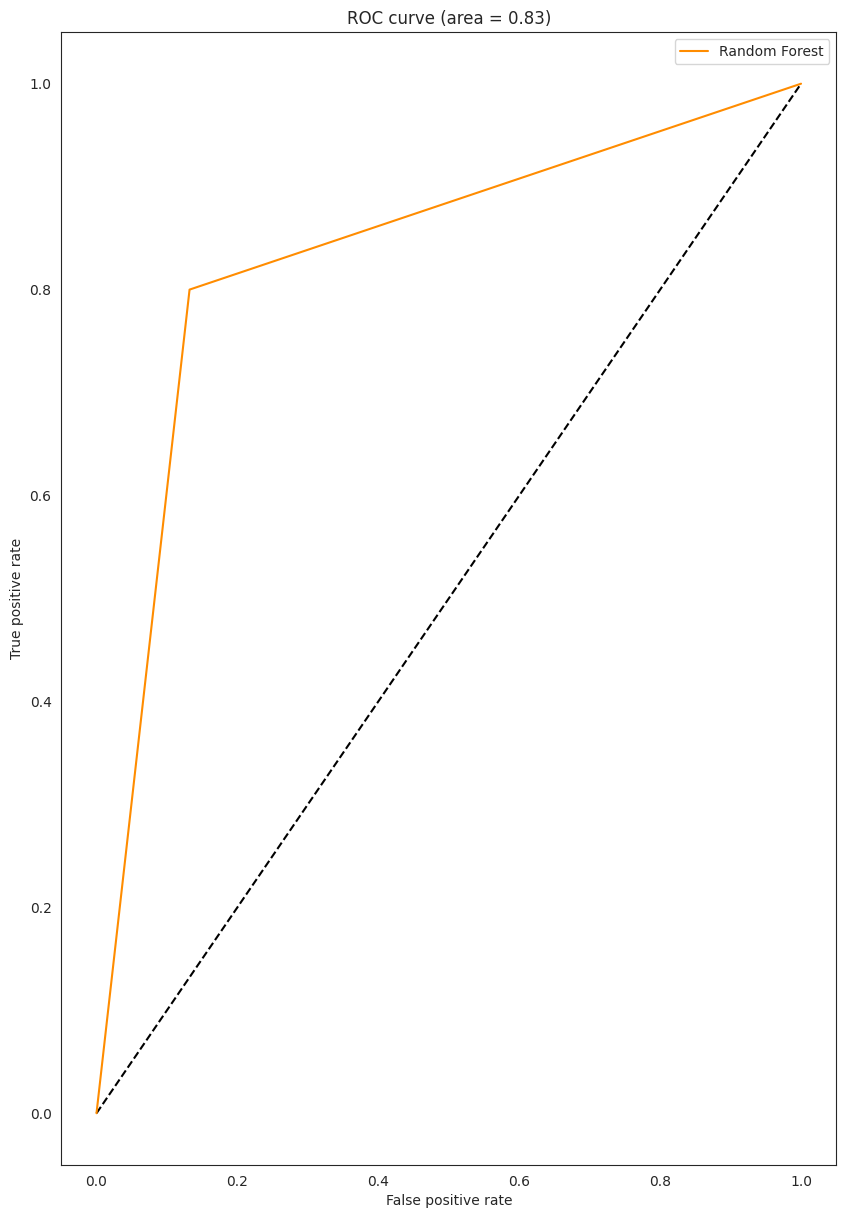

ROC for base model : bagging Classifier : 0.8339622641509434

Confusion Matrix : 
Confusion Matrix :  [[88 18]
 [22 88]]
Classification Accuracy :  0.8148148148148148
classification_error :  0.18518518518518517
sensitivity :  0.8
specificity :  0.8301886792452831
false_positive_rate :  0.16981132075471697
precision :  0.8301886792452831

Imp Features : 



In [ ]:
#spot check algorithms
models=[]
models.append(('Logistic Regression : LR', LogisticRegression()))
models.append(('Linear Discriminant Analysis : LDA ', LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('GaussianNB : NB', GaussianNB()))
models.append(('SVM',SVC()))
models.append(('Random Forest Classifier : RFC',RandomForestClassifier()))
models.append(('Ada Boosting',AdaBoostClassifier()))
models.append(('XG Boosting',XGBClassifier()))
models.append(('bagging Classifier',BaggingClassifier()))

		    
appended_data = []
# fit, transform and calcualte the metrics for each model
for name, model in models:
    print("==========================="+name+"================================")
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    Metrics = Print_Metrics(model,y_test,X_test,y_pred,X_train,y_train,name)
    appended_data.append(Metrics)
    print('')
    print('ROC for base model : '+name+ ' : ' + str(evaluate(model,X_train,y_train, X_test, y_test)))
    print('')
    print('Confusion Matrix : ')
    Confusion_Matrix(y_test, y_pred)
    print('')
    try:
      print('Imp Features : ')
      imp_feature(model)
    except:
      print('')

Result_Accuracy = pd.concat(appended_data)

###**Summary of the performance by models in descending order**

In [ ]:
Result_Accuracy.sort_values(by='Test accuracy', ascending=False)

ModelName  logloss  ...     r2    AUC
0  Linear Discriminant Analysis : LDA     5.597  ...  0.352  0.839
0       Random Forest Classifier : RFC    5.757  ...  0.333  0.834
0                         Ada Boosting    5.916  ...  0.315  0.829
0             Logistic Regression : LR    6.236  ...  0.278  0.820
0                                  KNN    6.236  ...  0.278  0.820
0                      GaussianNB : NB    6.236  ...  0.278  0.820
0                          XG Boosting    6.396  ...  0.259  0.815
0                   bagging Classifier    6.396  ...  0.259  0.815
0                                  SVM    6.716  ...  0.222  0.806
0             Decision Tree Classifier    7.036  ...  0.185  0.796

[10 rows x 7 columns]

**Note:** From the above table, XG Boosting, RandomForest, Ada Boosting, KNN Classifier, and SVM were performing in the most effective manner and producing the best results.

In [ ]:
import io
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline , FeatureUnion
from sklearn.feature_selection import SelectKBest, chi2 , f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import Normalizer
import xgboost as xgb
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import  precision_recall_curve

from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from tabulate import tabulate

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


Read the new imputed file


In [ ]:
#upload the file in the lab
from google.colab import files
uploaded = files.upload()
#read the datafile using pandas read_csv

TypeError: ignored

In [ ]:
Final_Data= pd.read_csv(io.BytesIO(uploaded['new_Imputed_knn.csv']))
#Final_Data = Final_Data.iloc[: , 1:]
Final_Data

age  sex        cp  trestbps  ...  slope        ca      thal  num
0    0.714286    1  0.000000  0.541667  ...    1.0  0.000000  0.750000    0
1    0.795918    1  1.000000  0.666667  ...    0.5  1.000000  0.000000    1
2    0.795918    1  1.000000  0.333333  ...    0.5  0.666667  1.000000    1
3    0.183673    1  0.666667  0.416667  ...    1.0  0.000000  0.000000    0
4    0.265306    0  0.333333  0.416667  ...    0.0  0.000000  0.000000    0
..        ...  ...       ...       ...  ...    ...       ...       ...  ...
713  0.857143    1  1.000000  0.291667  ...    0.5  0.350985  1.000000    1
714  0.857143    1  1.000000  0.500000  ...    0.5  0.330718  1.000000    1
715  0.897959    1  0.666667  0.666667  ...    0.5  0.666667  0.632318    0
716  0.918367    0  0.666667  0.666667  ...    0.0  0.140394  0.000000    1
717  0.938776    1  0.333333  0.541667  ...    0.0  0.211581  0.423843    1

[718 rows x 14 columns]

Split 30% Test and 70% Train

In [ ]:
# Fit grid search
y =Final_Data['num'] #target
X =Final_Data[["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal"]] #Features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

Function to calculate the Accuracy , F1 , Precision, recall, auc , R2

In [ ]:
#function to measure and print different performance metrics
def Print_Metrics(y_test,X_test,y_predict_test,X_train,y_train,modelName):
    print('\nModel performance on the test data set:')

    accuracy_test   = accuracy_score(y_test, y_predict_test)
    F1_test         = f1_score(y_test, y_predict_test)
    precision_test  = precision_score(y_test, y_predict_test, average='binary')
    recall_test     = recall_score(y_test, y_predict_test, average='binary')
    auc_test        = metrics.roc_auc_score(y_test, y_predict_test)
    r2_test         = metrics.r2_score(y_test, y_predict_test)


    header = ["Metric", "Test"]
    table  = [
               ["accuracy",  accuracy_test],
               ["precision", precision_test],
               ["F1",        F1_test],
               ["r2",        r2_test],
               ["AUC",       auc_test]
             ]
    result = {
        "accuracy":accuracy_test,
        "precision": precision_test,
        "F1":F1_test,
        "r2":r2_test,
        "AUC":auc_test
    }
    data = [[modelName,accuracy_test,precision_test,F1_test,r2_test,auc_test]]
    df_result = pd.DataFrame(data, columns = ['ModelName','Test accuracy','precision', 'F1', 'r2', 'AUC'])
    print(tabulate(table, header, tablefmt="fancy_grid"))
    return df_result

- Lamia

**Logistic** **Regression**

In [ ]:
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe1 = Pipeline(steps=[('scale', StandardScaler()),
('pca', pca), ('logistic', logistic)])
 # Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}
#kfold = StratifiedKFold(n_splits=10, random_state=7, shuffle=False)

#RFE BACKWARD SELECTION 
searchLR = GridSearchCV(pipe1, param_grid, n_jobs=-1)
searchLR.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % searchLR.best_score_)
print(searchLR.best_params_)
pipe1.fit(X_train, y_train)
Pipeline(steps=[('pca', pca), ('logistic', logistic)])
pipe1.score(X_test, y_test)






Best parameter (CV score=0.837):
{'logistic__C': 21.54434690031882, 'pca__n_components': 5}


0.8240740740740741

In [ ]:
#Using RFE 


# create pipeline
rfe = RFE(estimator=LogisticRegression(),n_features_to_select=9)
pipeline1 = Pipeline(steps=[('s',rfe),('logistic', logistic)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=7)
n_scores = cross_val_score(pipeline1, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
pipeline1.fit(X_train, y_train)

pipeline1.score(X_test, y_test)

0.8287037037037037

In [ ]:
LR_y_pred = searchLR.predict(X_test)
SVM_Metrics = Print_Metrics(y_test,X_test,LR_y_pred,X_train,y_train,'LogisticRegression')


Model performance on the test data set:
╒═══════════╤══════════╕
│ Metric    │     Test │
╞═══════════╪══════════╡
│ accuracy  │ 0.819444 │
├───────────┼──────────┤
│ precision │ 0.858586 │
├───────────┼──────────┤
│ F1        │ 0.813397 │
├───────────┼──────────┤
│ r2        │ 0.27753  │
├───────────┼──────────┤
│ AUC       │ 0.820326 │
╘═══════════╧══════════╛


**SVM**

0.8333333333333334

In [ ]:
#Using RFE 


# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=8, step=1)
rfe.fit(X, y)

pipeline1 = Pipeline(steps=[('s',rfe),('svc', SVC())])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=7)
n_scores = cross_val_score(pipeline1, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
pipeline1.fit(X_train, y_train)

pipeline1.score(X_test, y_test)

0.8333333333333334

In [ ]:
#param_grid = { 'C':[1],'kernel':['rbf'],'degree':[3],'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} This is the defualt parmater giving me lower accurcy
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(
    SVC(kernel='rbf', class_weight='balanced'), param_grid
)
clf = clf.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % clf.best_score_)
print(clf.best_params_)

print("Best estimator found by grid search:")
print(clf.best_estimator_)

Best parameter (CV score=0.845):
{'C': 10000.0, 'gamma': 0.005}
Best estimator found by grid search:
SVC(C=10000.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.005,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [ ]:
SVM_y_pred1 = clf.predict(X_test)

In [ ]:
# Print Metrics to evaluate model
SVM_Metrics = Print_Metrics(y_test,X_test,SVM_y_pred1,X_train,y_train,'SVM')


Model performance on the test data set:
╒═══════════╤══════════╕
│ Metric    │     Test │
╞═══════════╪══════════╡
│ accuracy  │ 0.805556 │
├───────────┼──────────┤
│ precision │ 0.826923 │
├───────────┼──────────┤
│ F1        │ 0.803738 │
├───────────┼──────────┤
│ r2        │ 0.221955 │
├───────────┼──────────┤
│ AUC       │ 0.806003 │
╘═══════════╧══════════╛


- Dharitri

- Sabih

**Model : DecisionTreeClassifier**

In [ ]:
dec_tree_pipe = Pipeline([
                          ('scale', StandardScaler()),
                          ('pca', PCA()),
                          ('dec_tree', DecisionTreeClassifier())
                       ])

In [ ]:
# Define hyperparam for DT and SelectKBest

dec_tree_Param = [
  {
    #'pca__n_estimators': list(range(1,X.shape[1]+1,1)),
    'dec_tree__criterion': ['gini', 'entropy'],
    'dec_tree__max_depth': range(1,15),
    'dec_tree__min_samples_split' : range(1,15),
    'dec_tree__min_samples_leaf' : range(1,15),
    'pca__n_components' :[6,7,8,9,10],
  }
]

In [ ]:
# Define cross validation
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=False)

# Defining Score to evaluate the model
scoring = {
          'AUC':'roc_auc', 
           'Accuracy':make_scorer(accuracy_score),
          'precision_score': make_scorer(precision_score),
          'recall_score': make_scorer(recall_score)
           }

# Define grid search
dec_tree_grid = GridSearchCV(
  dec_tree_pipe,
  param_grid=dec_tree_Param,
  cv=kfold,
  scoring=scoring,
  refit='AUC',
  verbose=1,
  n_jobs=-1
)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
# Fitting the model using X_train and y_train
dec_tree_model = dec_tree_grid.fit(X_train, y_train)

Fitting 10 folds for each of 27440 candidates, totalling 274400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 2940 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 6940 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 12540 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 19740 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 28540 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 38940 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 50940 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 64540 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 79740 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 96540 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 114940 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 134940 tasks      | elapsed: 16.0min
[Parallel(n_jobs=-1)]: Done 156540 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 1

In [ ]:
# predict based on test data
y_pred_dec_tree = dec_tree_model.predict(X_test)

In [ ]:
# Print Metrics to evaluate model
sgb_Metrics = Print_Metrics(y_test,X_test,y_pred_dec_tree,X_train,y_train,'DecisionTreeClassifier')


Model performance on the test data set:
╒═══════════╤══════════╕
│ Metric    │     Test │
╞═══════════╪══════════╡
│ accuracy  │ 0.791667 │
├───────────┼──────────┤
│ precision │ 0.777778 │
├───────────┼──────────┤
│ F1        │ 0.801762 │
├───────────┼──────────┤
│ r2        │ 0.166381 │
├───────────┼──────────┤
│ AUC       │ 0.790995 │
╘═══════════╧══════════╛


In [ ]:
#dec_tree_grid.best_estimator_.get_params()
dec_tree_grid.best_estimator_

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=10,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('dec_tree',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=4,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=4,
                                        min_samples_split=14,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                

**Model : KNNClassifier**

In [ ]:
knn_pipe = Pipeline([
                          ('scale', StandardScaler()),
                          ('pca', PCA()),
                          ('KNN', KNeighborsClassifier())
                       ])

In [ ]:
# Define hyperparam for DT and SelectKBest

KNN_Param = [
  {
    'KNN__n_neighbors' :[2,4,6,8,10,12,14,16], 
    'KNN__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'KNN__leaf_size' :[1,2,3,4,5,6,7,8,9,10],
    'KNN__p' :[1,2,3,4,5],
    'pca__n_components' :[6,7,8,9,10]
  }
]

In [ ]:
# Define cross validation
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=False)

# Defining Score to evaluate the model
scoring = {
          'AUC':'roc_auc', 
           'Accuracy':make_scorer(accuracy_score),
          'precision_score': make_scorer(precision_score),
          'recall_score': make_scorer(recall_score)
           }

# Define grid search
KNN_grid = GridSearchCV(
  knn_pipe,
  param_grid=KNN_Param,
  cv=kfold,
  scoring=scoring,
  refit='AUC',
  verbose=1,
  n_jobs=-1
)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
# Fitting the model using X_train and y_train
knn_model = KNN_grid.fit(X_train, y_train).l

NameError: ignored

In [ ]:
# predict based on test data
y_pred_knn = knn_model.predict(X_test)

In [ ]:
# Print Metrics to evaluate model
sgb_Metrics = Print_Metrics(y_test,X_test,y_pred_knn,X_train,y_train,'KNeighborsClassifier')

In [ ]:
KNN_grid.best_estimator_.get_params()

In [ ]:
KNN_grid.best_estimator_

# **- Anwesh**


**Model : XGBoost**

In [ ]:
# Create a pipeline 1. Normalize the data , 2. Feature Selection Normalizer , 3. XGB
xgb_pipe = Pipeline([
 # ('norm', Normalizer()),
  #('fs', SelectKBest()),
  ('xgb_clf', xgb.XGBClassifier(objective='binary:logistic'))
])

In [ ]:
# Define hyperparam for XGB and SelectKBest
xgb_Param = [
  {
    'xgb_clf__n_estimators': [50, 100, 150, 200],
    'xgb_clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
    'xgb_clf__max_depth': range(3, 10),
    'xgb_clf__colsample_bytree': [i/10.0 for i in range(1, 3)],
    'xgb_clf__gamma': [i/10.0 for i in range(3)],
    'xgb_clf__min_child_weight': [1, 5, 10],
   # 'xgb_clf__eta': [0.01,0.1,0.2],
   # 'fs__score_func': [f_classif], #,chi2],
    #'fs__k': [6,7,8,9,10],
  }
]

In [ ]:
# Define cross validation
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=False)

# Defining Score to evaluate the model
scoring = {
          'AUC':'roc_auc', 
           'Accuracy':make_scorer(accuracy_score),
          'precision_score': make_scorer(precision_score),
          'recall_score': make_scorer(recall_score)
           }

# Define grid search
xgb_grid = GridSearchCV(
  xgb_pipe,
  param_grid=xgb_Param,
  cv=kfold,
  scoring=scoring,
  refit='AUC',
  verbose=1,
  n_jobs=-1
)

In [ ]:
# Fitting the model using X_train and y_train
xgb_model = xgb_grid.fit(X_train, y_train)

In [ ]:
# predict based on test data
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
#{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 
#'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 3, 
#'min_child_weight': 1, 'missing': None, 'n_estimators': 100, 'n_jobs': 1, 'nthread': None, 
#'objective': 'binary:logistic', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 
#'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 1, 'verbosity': 1}

In [ ]:
# Print Metrics to evaluate model
sgb_Metrics = Print_Metrics(y_test,X_test,y_pred_xgb,X_train,y_train,'XGBoosting')

In [ ]:
xgb_model.best_params_

**Model : Gussian NB**

In [ ]:
# Create a pipeline 1. Normalize the data , 2. Feature Selection Normalizer , 3. XGB
gnb_pipe = Pipeline([
 # ('norm', Normalizer()),
 #('fs', SelectKBest()),
  ('gnb_clf', GaussianNB())
])

In [ ]:
# Define hyperparam for XGB and SelectKBest
gnb_Param = [
  {
    'gnb_clf__priors': [None],
    'gnb_clf__var_smoothing': [0.00000001, 0.000000001, 0.0000000001,0.00000000001,0.000000000001],
    #'fs__score_func': [f_classif,chi2],
    #'fs__k': [6,7,8,9,10],
  }
]

In [ ]:
# Define cross validation
kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=False)

# Defining Score to evaluate the model
scoring = {
          'AUC':'roc_auc', 
           'Accuracy':make_scorer(accuracy_score),
          'precision_score': make_scorer(precision_score),
          'recall_score': make_scorer(recall_score)
           }

# Define grid search
gnb_grid = GridSearchCV(
  gnb_pipe,
  param_grid=gnb_Param,
  cv=kfold,
  scoring=scoring,
  refit='AUC',
  verbose=1,
  n_jobs=-1
)

In [ ]:
# Fitting the model using X_train and y_train
gnb_model = gnb_grid.fit(X_train, y_train)

In [ ]:
# predict based on test data
y_pred_gnb = gnb_model.predict(X_test)

In [ ]:
# Print Metrics to evaluate model
gnb_Metrics = Print_Metrics(y_test,X_test,y_pred_gnb,X_train,y_train,'Gussian NB')

#Dharitri
* LDA
  * feature selection
  * Algorithm tuning
  *training with best parameters obtained in grid serach
  *prediction

Ensembles:----
* RandomForest:
  * base score
  * hyper parameter tuning-- 
  * train with best parameters
  * predict 

* Adaboosting--- It is boosting algorithm
  *base score
  *hyper parmetr tuning
  *train with best parameters
  *predict
* Voting classifier
  * train on above 3 model with best parameters
  * fit 
  * predict

In [ ]:
#LDA--
results=[]
pipelines = [] 

pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('PCA',PCA(n_components=6)),('LDA', LinearDiscriminantAnalysis())])))

for name, model in pipelines:
  kfold=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
  cv_results= cross_val_score(model, X_train,y_train,cv=kfold, scoring= 'accuracy')
  results.append(cv_results)
  names.append(name)
  msg= "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)
